# Global Power Plant Database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
#checking the shape of the data
df.shape

(907, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
#cheching the null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
# Checking the unique value present in the dataset
df.nunique().sort_values(ascending=False)

name                        907
gppd_idnr                   907
latitude                    836
longitude                   827
generation_gwh_2018         410
generation_gwh_2017         408
generation_gwh_2016         403
generation_gwh_2015         396
generation_gwh_2014         371
capacity_mw                 361
url                         304
owner                       280
source                      191
commissioning_year           73
primary_fuel                  8
other_fuel1                   3
geolocation_source            3
generation_data_source        1
country                       1
year_of_capacity_data         1
country_long                  1
other_fuel2                   1
generation_gwh_2013           0
wepp_id                       0
other_fuel3                   0
generation_gwh_2019           0
estimated_generation_gwh      0
dtype: int64

In [8]:
#Checking the null/missing ratio of the dataset
dt = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
dt

estimated_generation_gwh    100.000000
other_fuel3                 100.000000
wepp_id                     100.000000
generation_gwh_2013         100.000000
generation_gwh_2019         100.000000
other_fuel2                  99.889746
other_fuel1                  78.169791
owner                        62.293275
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_data_source       50.496141
year_of_capacity_data        42.778390
commissioning_year           41.896362
latitude                      5.071665
longitude                     5.071665
geolocation_source            2.094818
country                       0.000000
url                           0.000000
country_long                  0.000000
primary_fuel                  0.000000
capacity_mw                   0.000000
gppd_idnr                     0.000000
name                     

Decision on Dropping the columns in the dataset - 

1. country, country_long, name, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh, gppd_idnr, are not adding any information to the dataset hence dropping it
2. other_fuel1, other_fuel2, other_fuel3 are having null values 78%, 99% and 100% respectively, Hence dropping it
3. droping url also as it will not add any value to the data

In [9]:
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013','generation_data_source','estimated_generation_gwh','generation_gwh_2019'],axis=1, inplace=True)

In [10]:
df.drop('url',axis=1, inplace=True)

In [11]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [13]:
df.skew()

capacity_mw              3.123576
latitude                -0.145866
longitude                1.112646
commissioning_year      -1.067949
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      3.665904
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

In [14]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Capacity in megawatt is highly right skewed as the mean is more than median

In [15]:
# Checking the value count of Capacity
df['primary_fuel'].value_counts() 

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [16]:
# Splitting the dataset by 'Categorical' and 'Numerical' based on data types

df_cat = []
for i in df.columns:
    if df.dtypes[i] == 'object':
        df_cat.append(i)
        
df_num=[]
for i in df.columns:
    if df.dtypes[i] != 'object':
        df_num.append(i)
        
print('Categorical Columns',df_cat)
print('Numerical Columns',df_num)

Categorical Columns ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'source', 'geolocation_source']
Numerical Columns ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [17]:
df.sample(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
688,IND,India,SANGLI MIRAJ BIOMASS,WRI1019982,10.0,16.9171,74.4821,Biomass,NaN,Sinewave Pvt ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
685,IND,India,SAMAYANALLUR DG,IND0000390,106.0,9.9751,78.0445,Oil,2001.0,Central Electricity Authority,WRI,2019.0,243.634,39.9540,11.308044,NaN,0.0
597,IND,India,PRYAGRAJ (BARA) TPP,IND0000346,1980.0,25.1960,81.6594,Coal,2016.0,Central Electricity Authority,WRI,2019.0,NaN,219.5193,4004.000000,5155.986,7200.4


<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

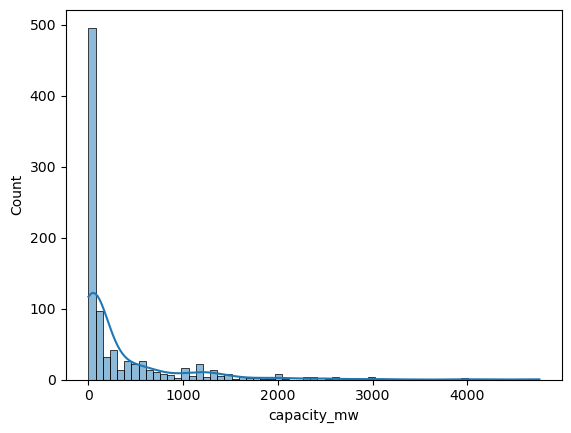

In [18]:
#Plotting capacity_mw
sns.histplot(x='capacity_mw', kde=True, data=df)

Coal       0.284454
Hydro      0.276736
Solar      0.140022
Wind       0.135612
Gas        0.076075
Biomass    0.055127
Oil        0.022051
Nuclear    0.009923
Name: primary_fuel, dtype: float64

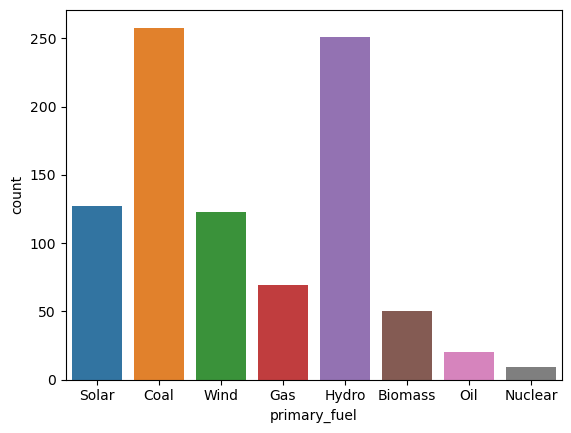

In [19]:
# Plotting primary fuel in count plot
sns.countplot(x='primary_fuel', data=df)
df['primary_fuel'].value_counts(normalize=
                                True)

In primary fuels of Power plant in India have 28% coal, 27% Hydro, 14% Solar, 13% wind, 7% gas, 5% biomass, 2% oil, 0.9% nuclear

2015.0    0.053131
2013.0    0.047438
2012.0    0.043643
2016.0    0.036053
2010.0    0.034156
            ...   
1946.0    0.001898
1956.0    0.001898
1937.0    0.001898
1949.0    0.001898
1953.0    0.001898
Name: commissioning_year, Length: 73, dtype: float64

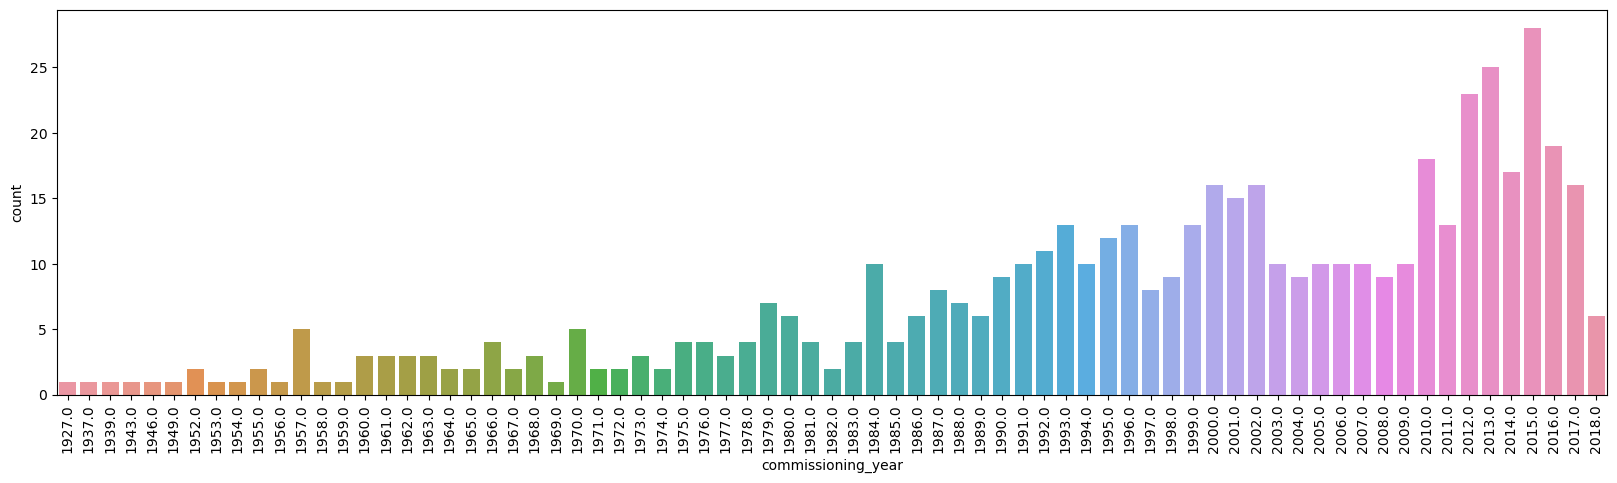

In [20]:
#Plotting commissioning_year in count plot
plt.figure(figsize=(20,5))
sns.countplot(x='commissioning_year', data=df)
plt.xticks(rotation =90)
df['commissioning_year'].value_counts(normalize=True)

As the years passing on the no of power plants comminssioning

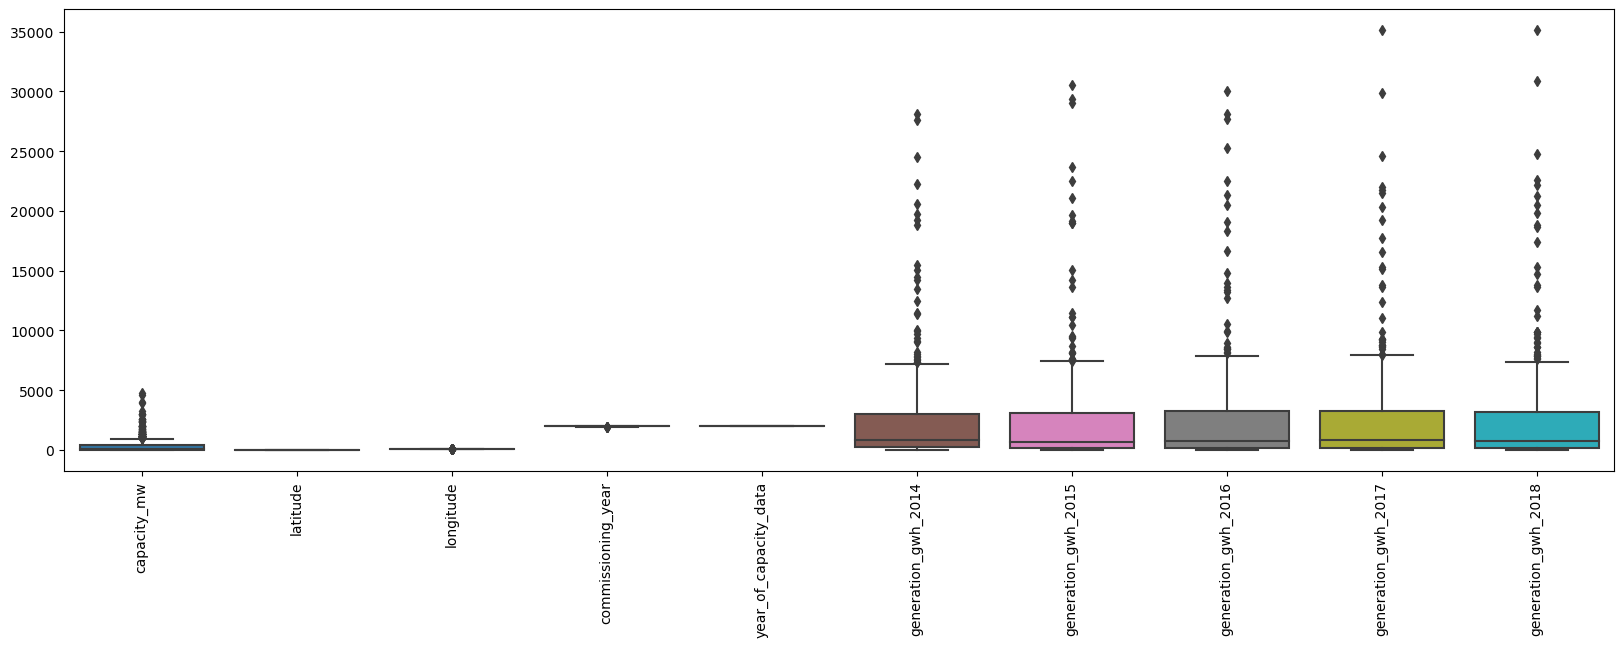

In [21]:
# checking for the outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

As we can see that the capacity_mw has outliers that can be treated later on

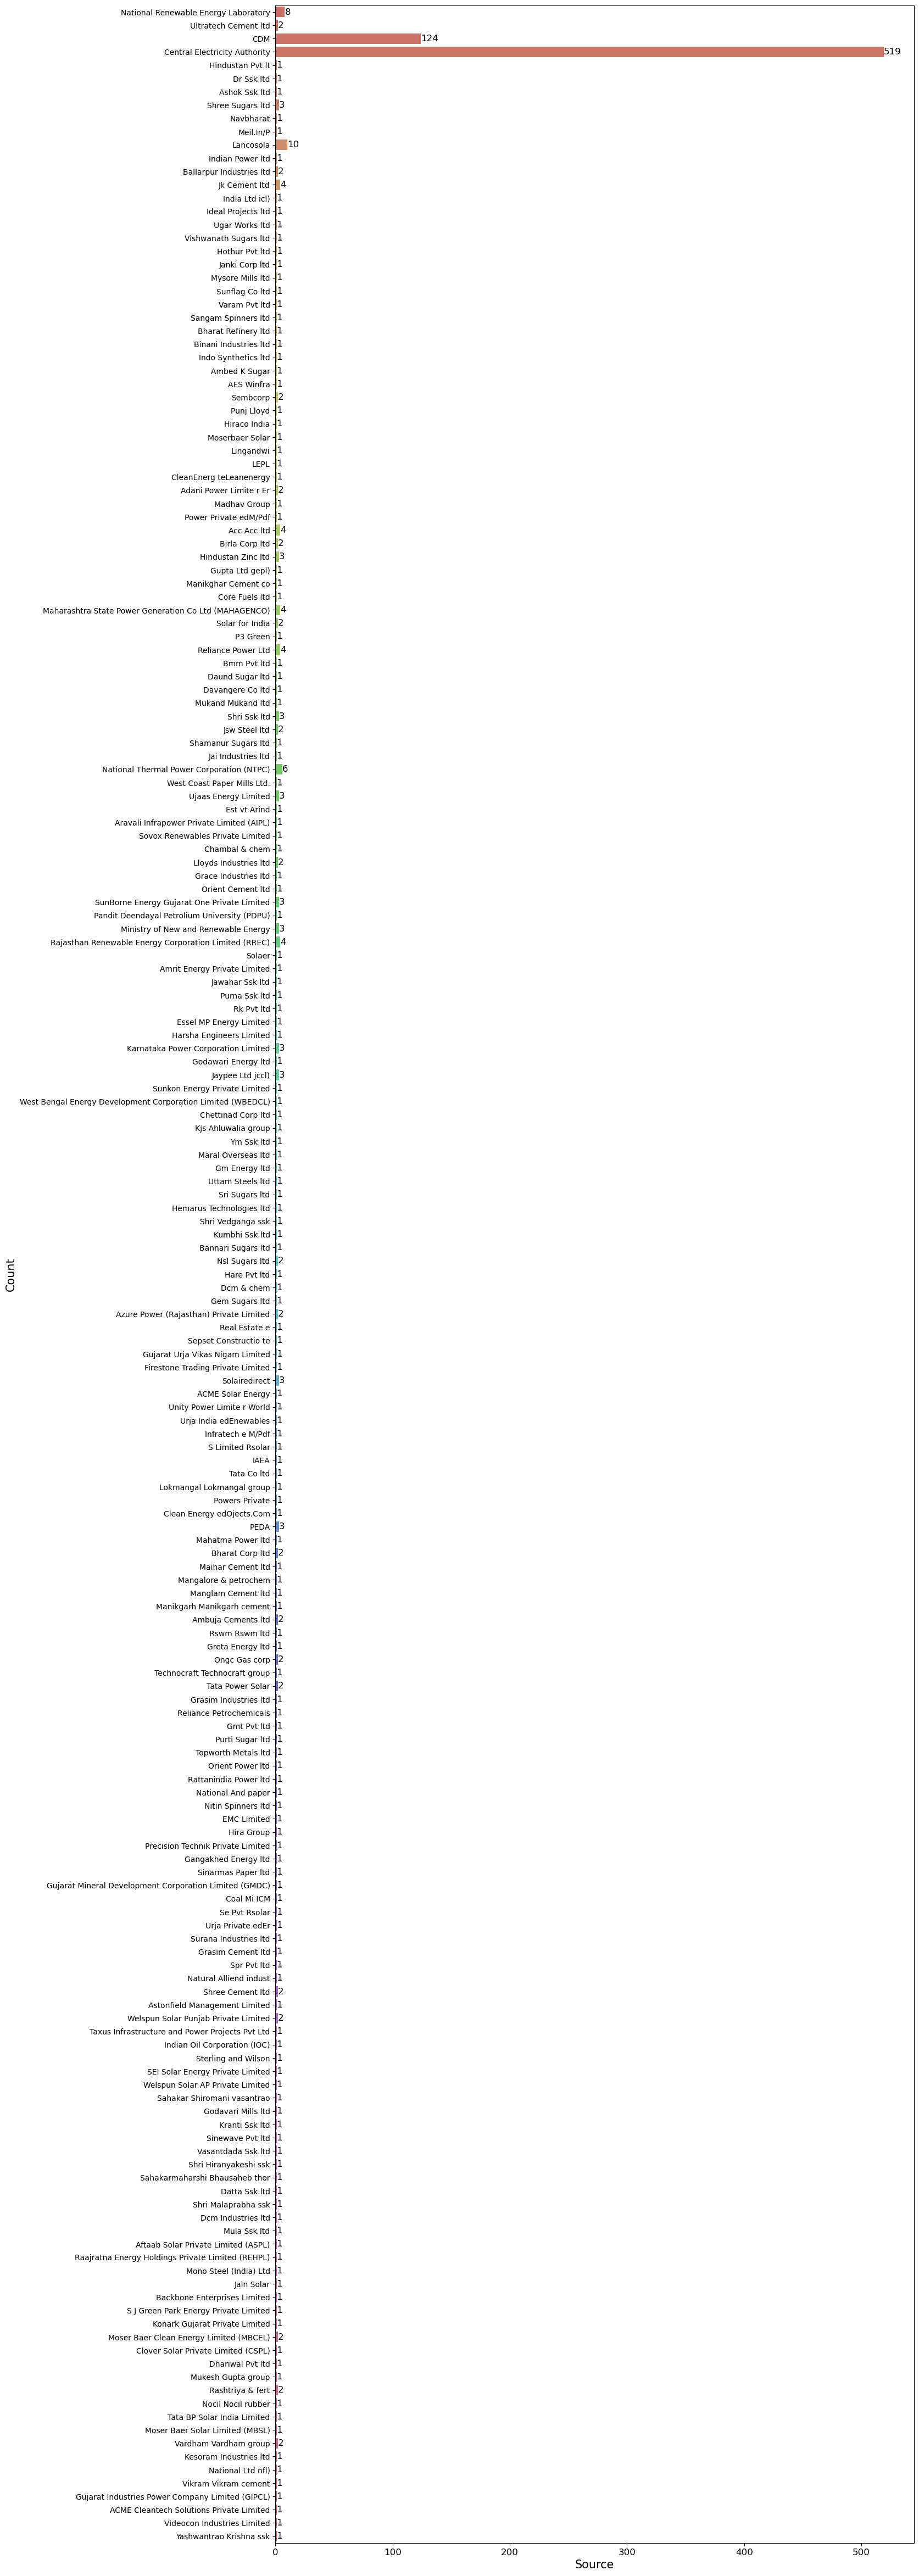

In [22]:
#Visualizing feature 'source' with countplot

plt.figure(figsize=(15,60))
ab = sns.countplot(y=df['source'],palette="hls")
plt.xlabel('Source',fontsize = 15)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)

More than 50% of the data source are reported by Central Electricity Authority

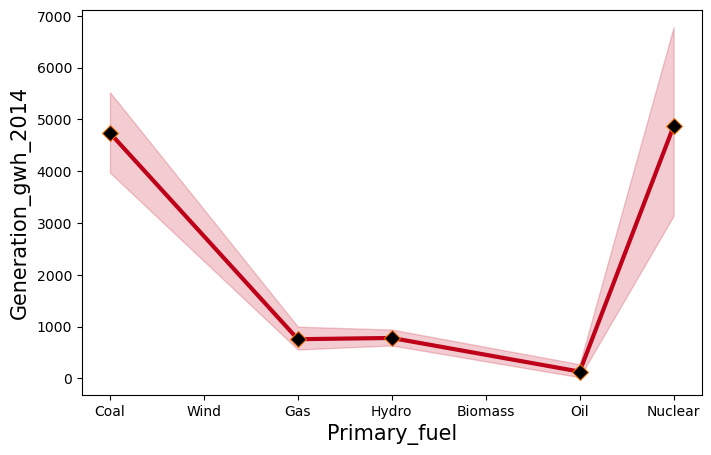

In [24]:
# Comparing primary fuel with generation_gwh_2014 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data =df,x='primary_fuel',y='generation_gwh_2014',color="#be0119",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2014',fontsize=15)
plt.show()

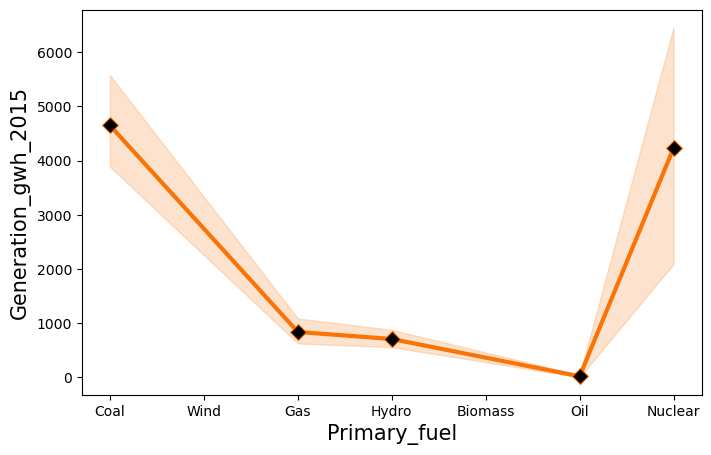

In [26]:
# Comparing primary fuel with generation_gwh_2015 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data = df, x='primary_fuel', y='generation_gwh_2015',color="#f97306",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2015',fontsize=15)
plt.show()

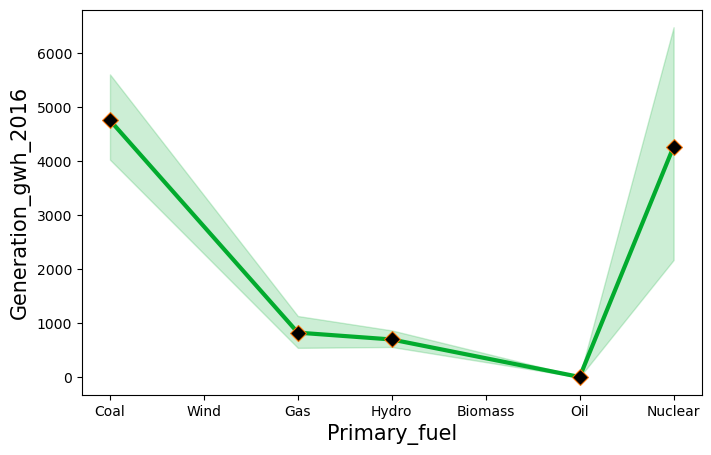

In [27]:
# Comparing primary fuel with generation_gwh_2016 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data = df, x='primary_fuel', y='generation_gwh_2016',color="#02ab2e",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2016',fontsize=15)
plt.show()

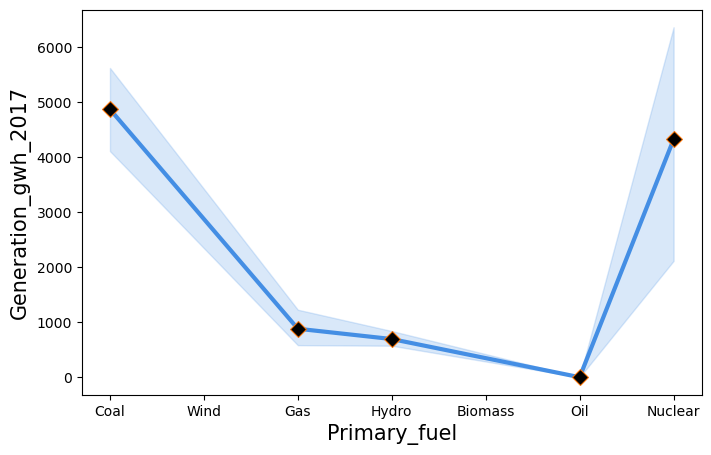

In [28]:
# Comparing primary fuel with generation_gwh_2017 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data = df, x='primary_fuel', y='generation_gwh_2017',color="#448ee4",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2017',fontsize=15)
plt.show()

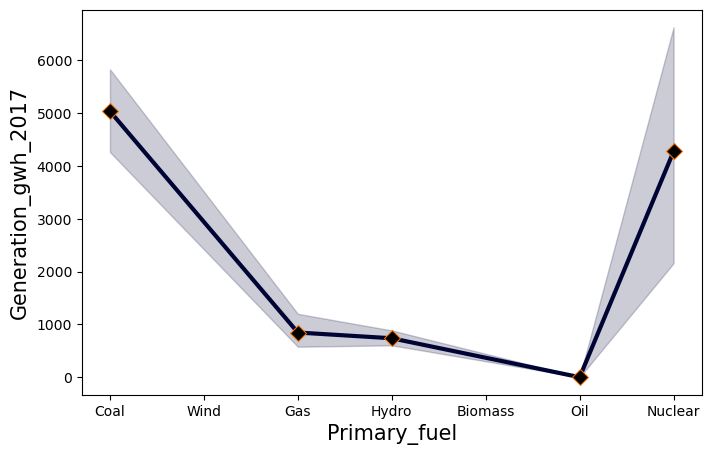

In [29]:
# Comparing primary fuel with generation_gwh_2018 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data = df, x='primary_fuel', y='generation_gwh_2018',color="#000435",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2017',fontsize=15)
plt.show()

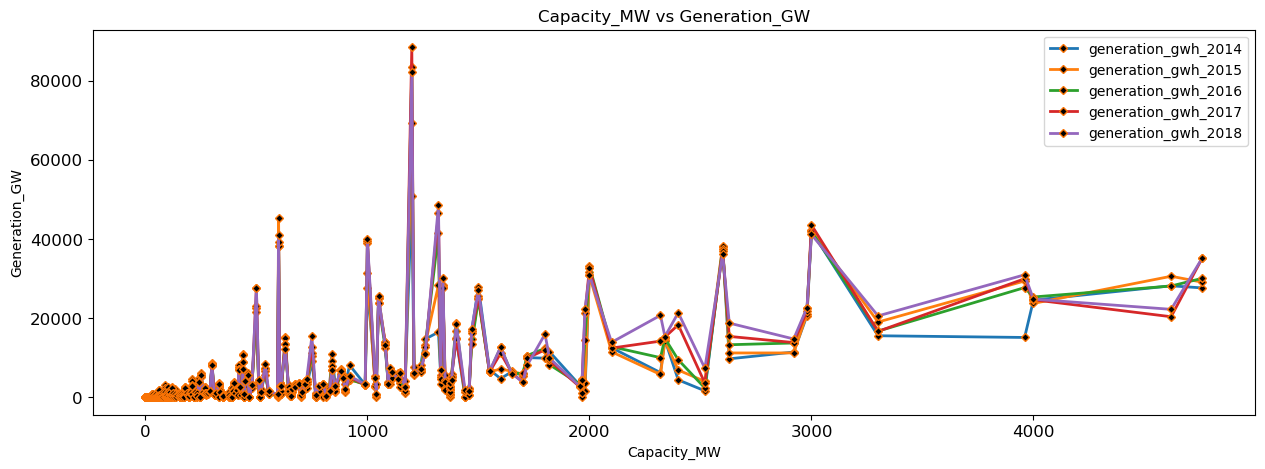

In [31]:
# Comparing 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'
# with 'capacity_mw'
gen = df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
               'generation_gwh_2017','generation_gwh_2018']].groupby(df['capacity_mw']).sum()
gen.plot(kind='line', fontsize=12,figsize=(15,5),
         linestyle = 'solid',linewidth=2,marker="D",markersize=4,markerfacecolor="k",markeredgecolor="#f97306")
plt.title("Capacity_MW vs Generation_GW")
plt.xlabel("Capacity_MW")
plt.ylabel("Generation_GW")
plt.show()

With the available data we can observe, in 2014 Coal and Nuclear power plants produced maximum electricity by gigawatts

In 2015,2016,2017 and 2018 power plants which uses Coal produced maximum electricity followed by Nuclear, Gas and Hydro

capacity_mw Vs generation_gwh_2014,2015,2016,2017,2018, we can observe the count of power plants which has the capacity ranges from 5 to 2000 megawatts are high when compared with power plants which has above 2000 megawatts

Generation of electricity increases when the capacity of power plant increases

Data may differ,as we dont have the complete details for Generation_gwh_2014,2015,2016,2017,2018

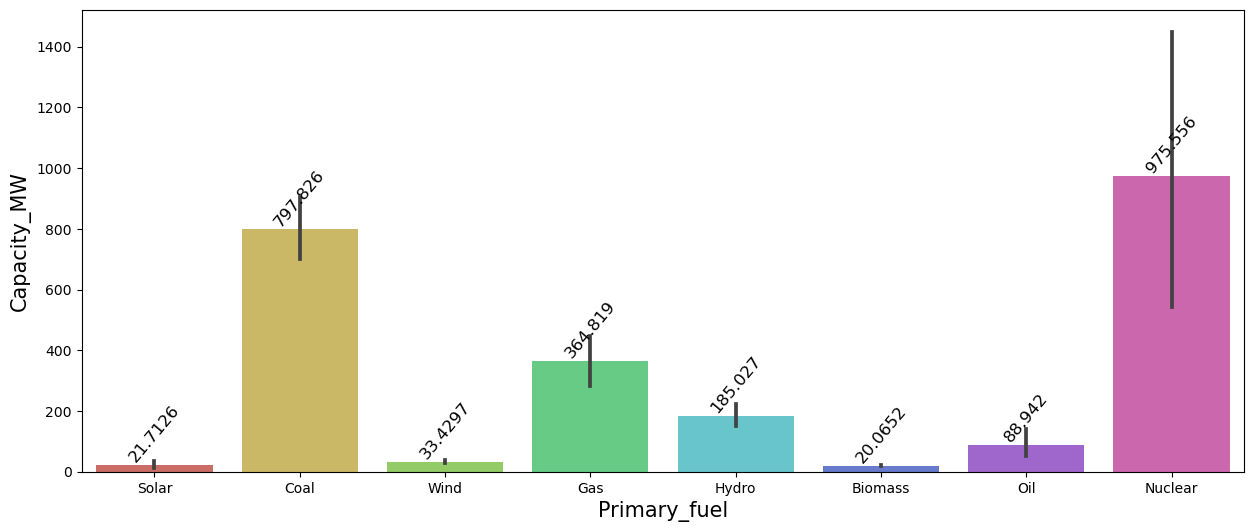

In [32]:
#Comparing primary fuel with capacity_mw by lineplot
plt.figure(figsize=(15,6))
fx=sns.barplot(data=df,x='primary_fuel',y='capacity_mw',palette="hls")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Capacity_MW',fontsize=15)
for i in fx.containers:
    fx.bar_label(i,fontsize=12,rotation=50)
plt.show()

We can observe from above barplot, power plants which uses Nuclear as primary fuel has the maximum capacity of 975 megawatts to generate electricity followed by power plants which uses Coal with 797 megawatts and power plants which uses gas with 364 megawatts of capacity

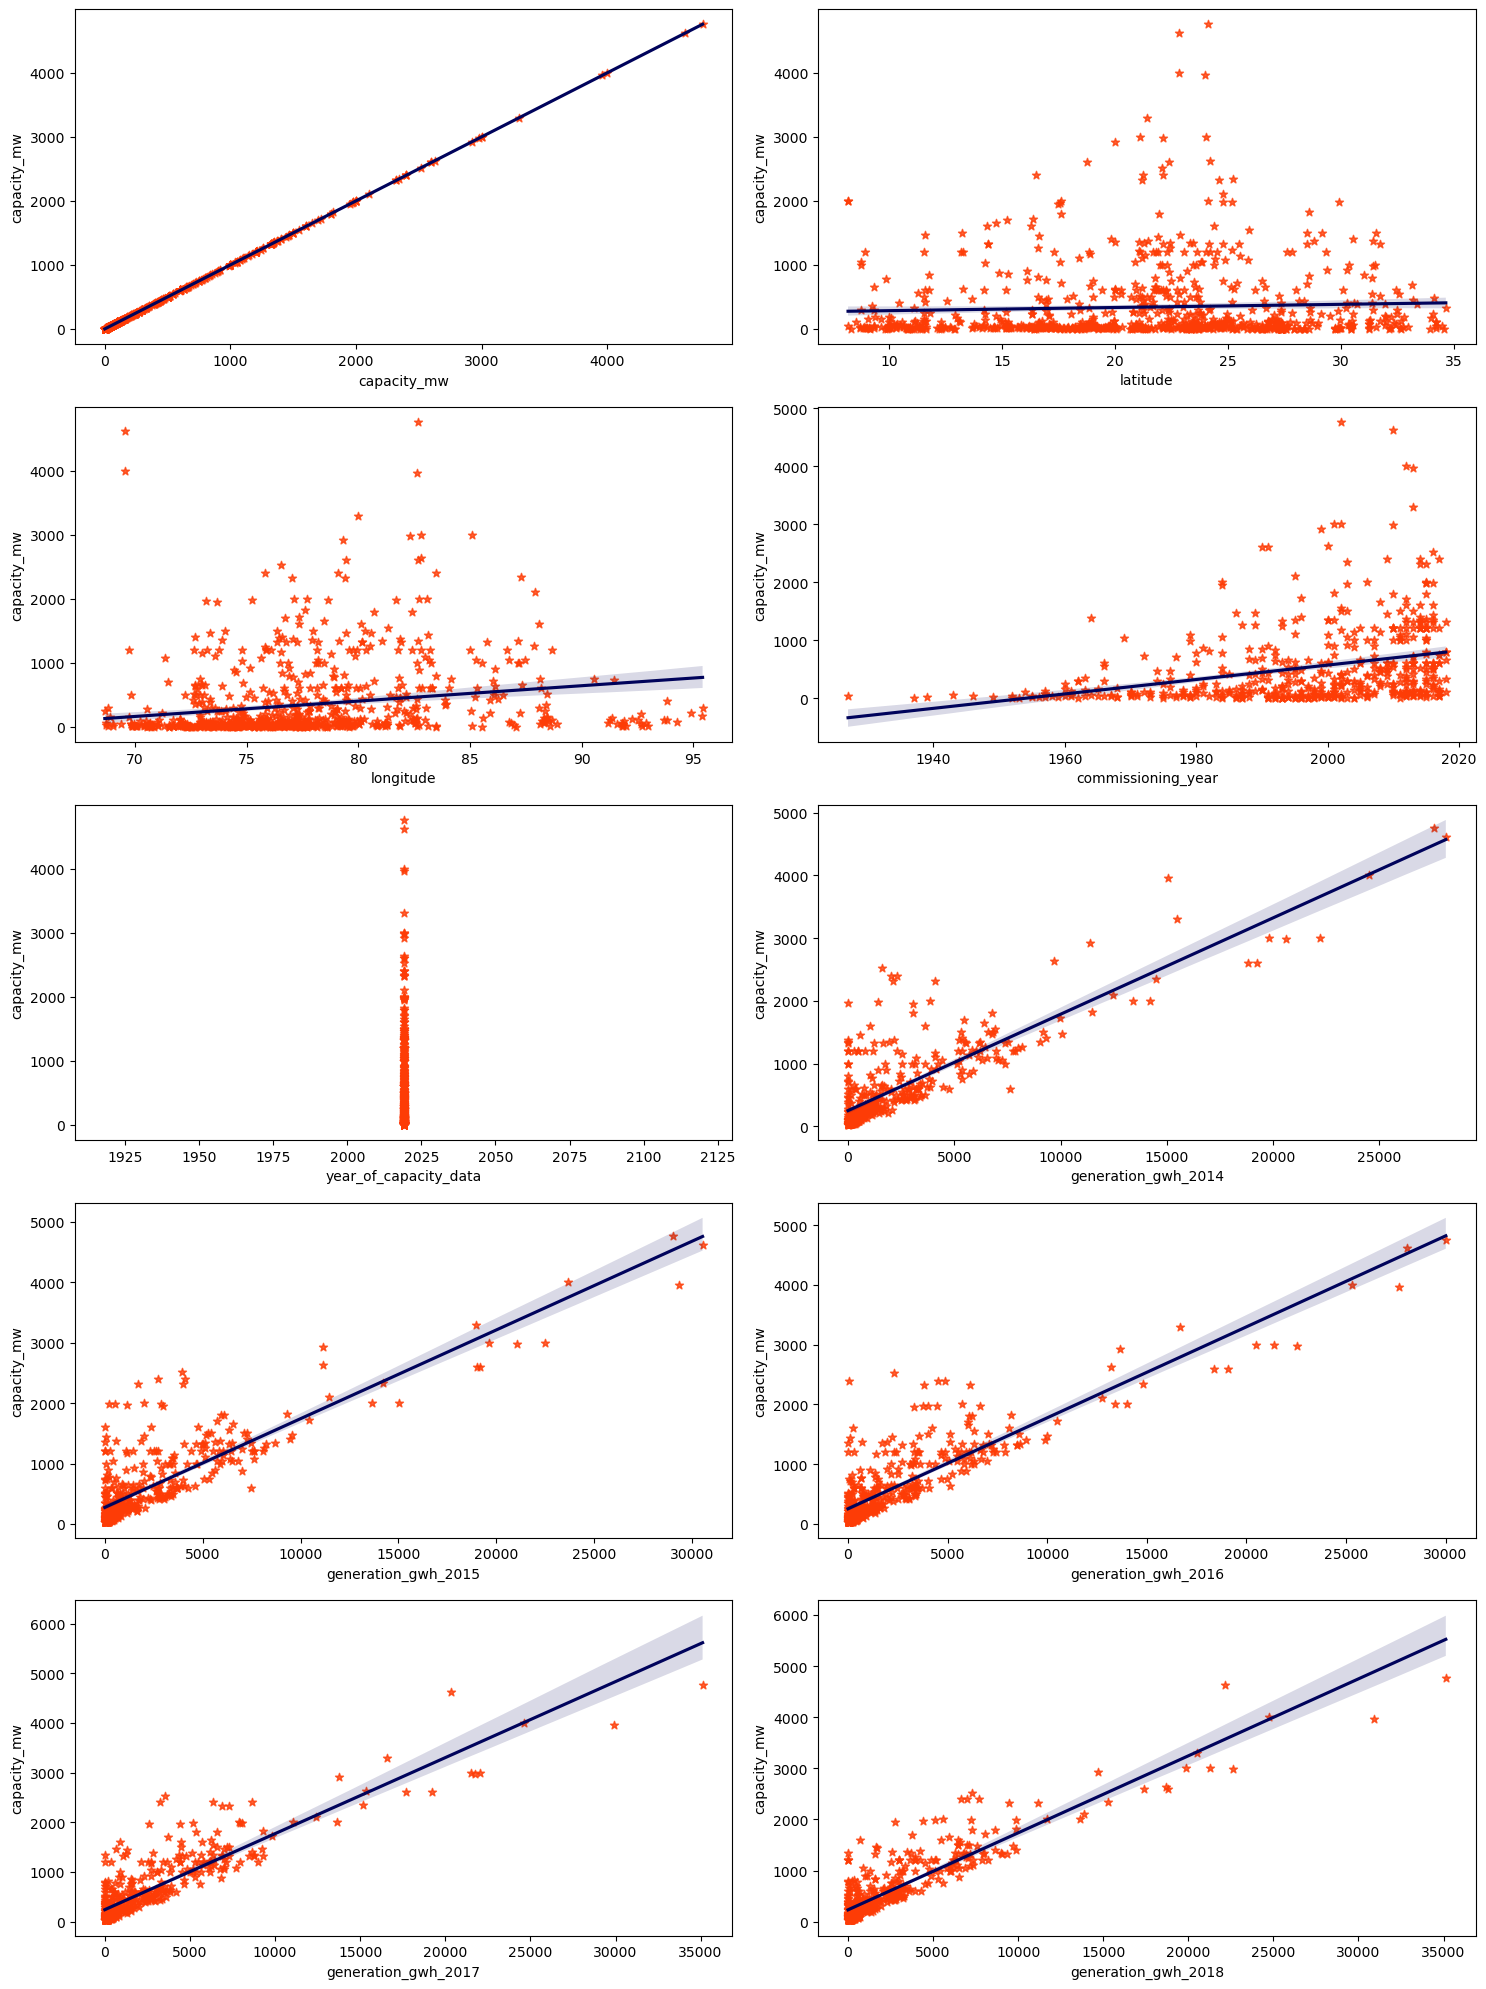

In [35]:
# Visualizing the dataset with regplot with target variable 'capacity_mw'

plt.figure(figsize=(15,20))
plot_number=1
for i in df_num:
    if plot_number <=10:
        ax=plt.subplot(5,2,plot_number)
        sns.regplot(x=df[i],y=df['capacity_mw'],scatter_kws={"color": "#fd3c06"}, 
                    line_kws={"color": "#00035b"},marker='*')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 have positive relation with the target variable capacity_mw

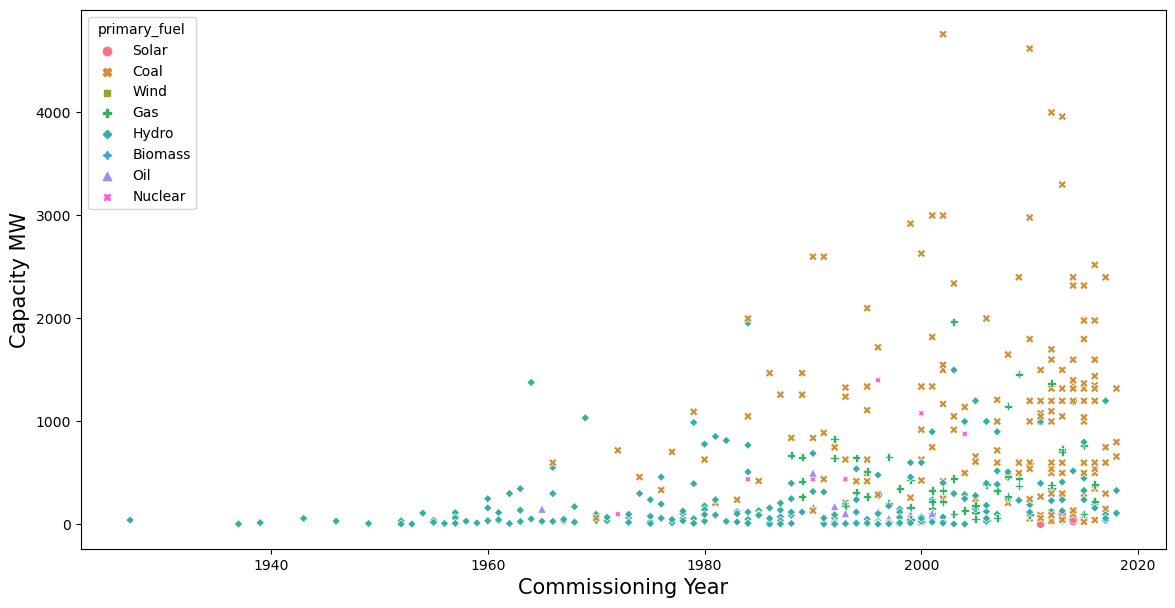

In [37]:
#Comparing commissioning year vs capacity_mw vs primary_fuel by scatterplot
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x="commissioning_year", y="capacity_mw", hue="primary_fuel",style="primary_fuel",
               palette='husl')
plt.xlabel('Commissioning Year',fontsize=15)
plt.ylabel('Capacity MW',fontsize=15)
plt.show()

From above scatter plot we can observe, before 1980's Hydro powered power plants are maximum in India

After 1980's power plants which uses coal as primary fuel started increasing with larger capacity across the country

# Data Feature Selection 

In [38]:
#Replacing Null values for numerical columns with mean
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN,strategy="mean")
df['latitude']=imp.fit_transform(df['latitude'].values.reshape(-1,1))

In [40]:
# Replacing Null values for numerical columns with median
imp = SimpleImputer(missing_values=np.NaN,strategy="median")
df['longitude']=imp.fit_transform(df['longitude'].values.reshape(-1,1))
df['generation_gwh_2015']=imp.fit_transform(df['generation_gwh_2015'].values.reshape(-1,1))
df['generation_gwh_2016']=imp.fit_transform(df['generation_gwh_2016'].values.reshape(-1,1))
df['generation_gwh_2017']=imp.fit_transform(df['generation_gwh_2017'].values.reshape(-1,1))
df['generation_gwh_2018']=imp.fit_transform(df['generation_gwh_2018'].values.reshape(-1,1))

In [42]:
# Filling the year of capacity with mode
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

In [43]:
#Replacing Null values with most frequent
imp = SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))

In [47]:
# Dropping features which are not much relevant for Model Prediction
df.drop(['country','country_long','gppd_idnr','name','year_of_capacity_data','generation_gwh_2014'],axis=1,inplace=True)         
df.shape

(907, 11)

Dropped columns 'country', 'country_long','name','gppd_idnr','year_of_capacity_data' as these features contains only 1 unique values and 'generation_gwh_2014' which contains 56% null values.

In [48]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

As we can see all thhe null values are removed from the dataset

In [49]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
commissioning_year    -1.714873
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

In [50]:
#checking dtypes for the data
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

## Label Encoding

In [51]:
# Encoding the Categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    if(df[i].dtypes=='object'):
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

## Correlation Analysis

<AxesSubplot:>

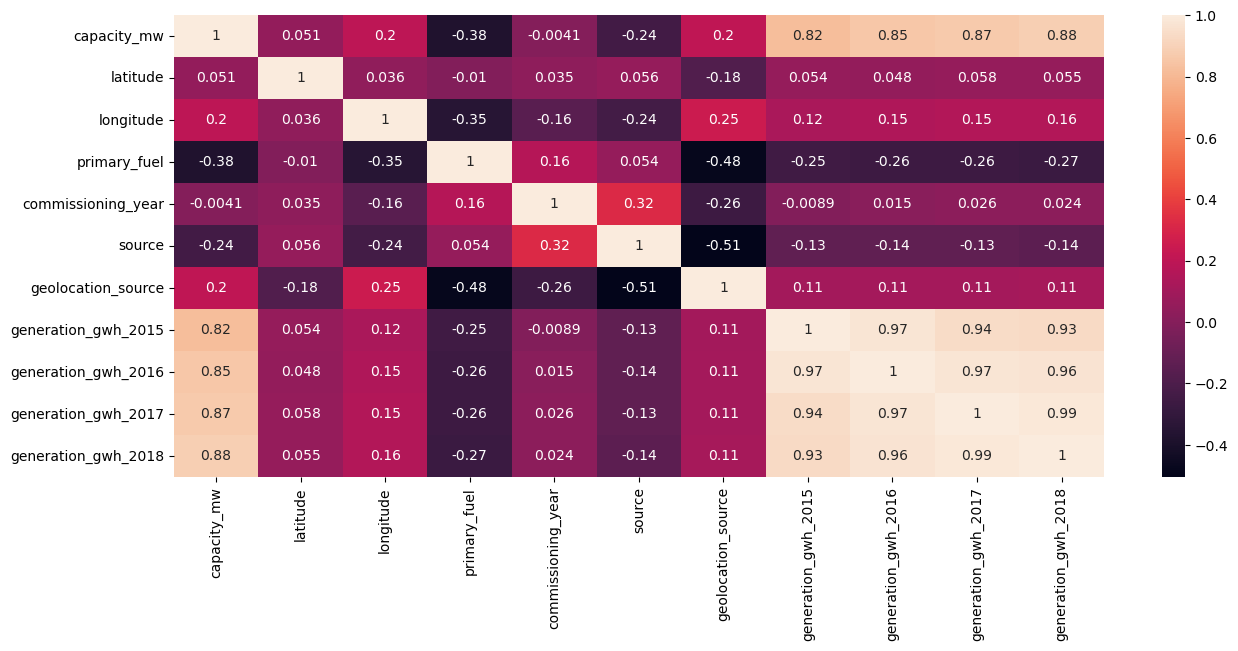

In [52]:
#Checking Correlation of the dataset with Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

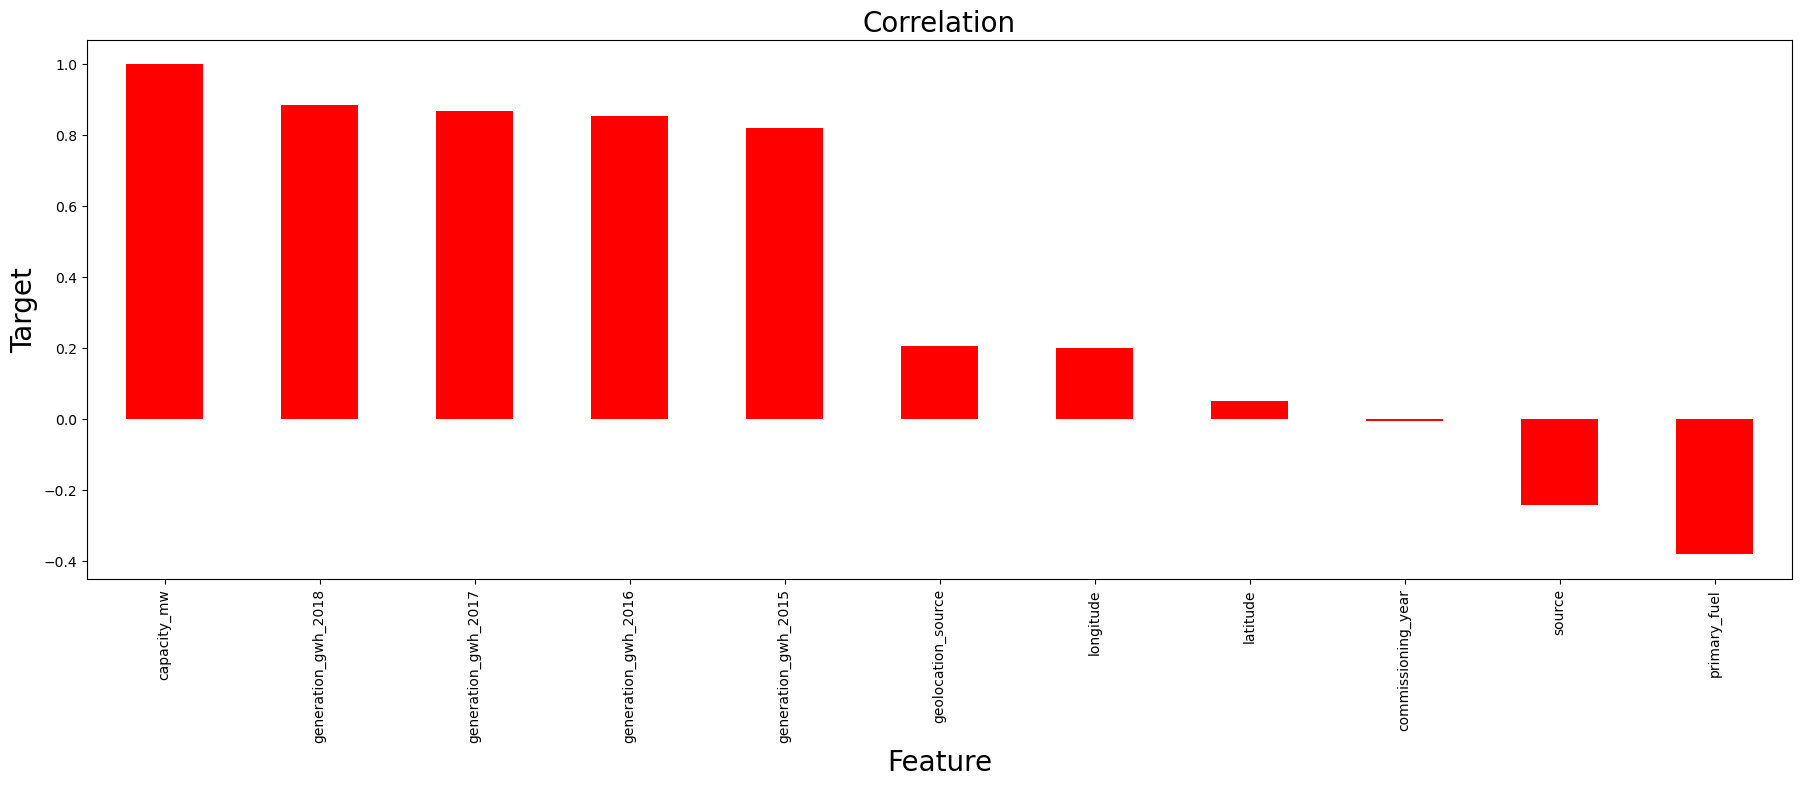

In [53]:
#Checking Correlation of the input attributes with the Target variable 'capacity_mw' by Bar Plot
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

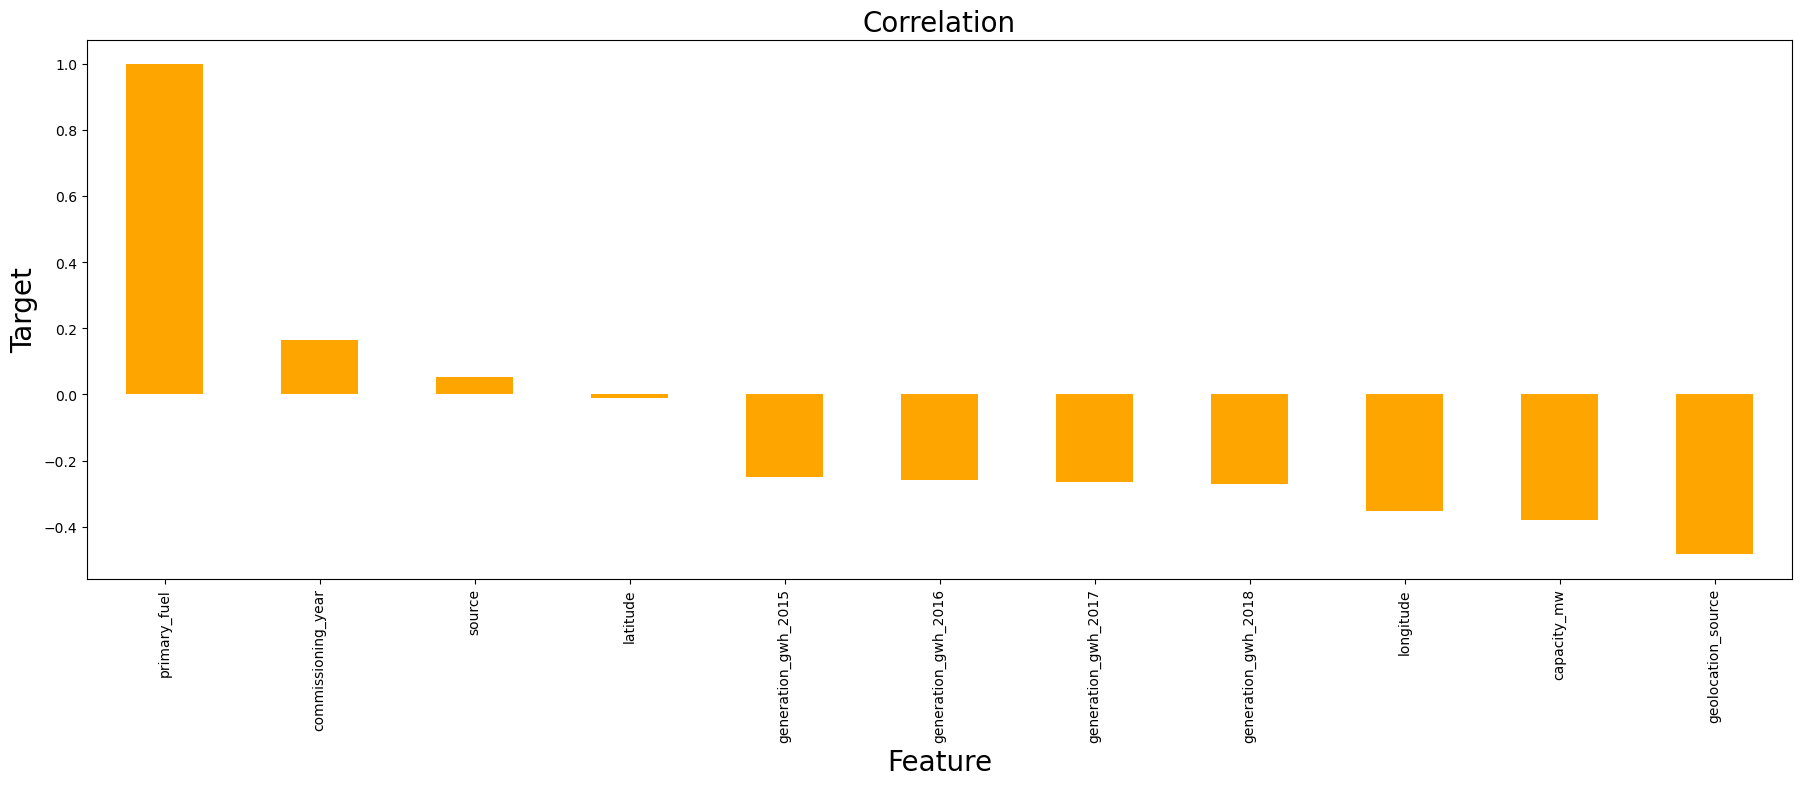

In [54]:
#Checking Correlation of the input attributes with the Target variable 'primary_fuel' by Bar Plot
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).plot(kind='bar',color='orange')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [55]:
df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
source                -0.242122
commissioning_year    -0.004072
latitude               0.050984
longitude              0.199299
geolocation_source     0.204865
generation_gwh_2015    0.819676
generation_gwh_2016    0.853008
generation_gwh_2017    0.868338
generation_gwh_2018    0.884840
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

In [56]:
df.corr()['primary_fuel'].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.352056
generation_gwh_2018   -0.271198
generation_gwh_2017   -0.263599
generation_gwh_2016   -0.259708
generation_gwh_2015   -0.249304
latitude              -0.010204
source                 0.053613
commissioning_year     0.164947
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

1. Based on heatmap and barplot we can observe 'primary_fuel' and 'source' are negatively correlated with target variable 'capacity_mw'
2. 'latitude ','longitude','geolocation_source','commissioning_year','generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018' are positively correlated with target variable 'capacity_mw'
3. For the target variable 'primary_fuel', we can see 'geolocation_source','capacity_mw','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','latitude ' and 'longitude' are negatively correlarted
4. 'source' is positively correlated with target variable 'primary_fuel'
5. Moreover 'geolocation_source' and 'source' are negatvely correlated to each other

## Outliers Treatment with Zscore

In [58]:
#Removing outliers with zscore 
from scipy.stats import zscore

col = ['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
       'generation_gwh_2018']
z1 = df[col]
z1.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,2015.0,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,2015.0,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2004.0,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,5916.370000,6243.000000,5385.579736,7279.000000


In [59]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 179, 183,
       209, 209, 209, 209, 209, 222, 244, 308, 308, 308, 308, 308, 323,
       333, 340, 342, 360, 363, 364, 364, 364, 364, 364, 371, 375, 416,
       427, 444, 454, 478, 482, 482, 484, 493, 493, 493, 493, 493, 494,
       494, 494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 601,
       621, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695,
       695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 724, 724, 724,
       724, 726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786,
       788, 807, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880, 880,
       880, 880]), array([0, 4, 5, 6, 7, 0, 4, 5, 6, 7, 0, 2, 2, 0, 4, 5, 6, 7, 3, 2, 0, 4,
       5, 6, 7, 2, 2, 2, 3, 2, 0, 0, 4, 5, 6, 7, 3, 0, 2, 2, 3, 3, 3, 0,
       7, 3, 0, 4, 5, 6, 7, 0, 4, 5, 6, 7, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3,
       2, 0, 4, 5, 6, 7, 0, 4, 5, 6, 7, 0, 4, 5, 6, 7, 3, 3, 4, 5, 6, 7,
       4, 5, 6, 7, 0, 4, 5, 6, 7, 3, 0, 

In [60]:
df2 = df[(z<3).all(axis=1)]

In [61]:
df.shape

(907, 11)

In [62]:
df2.shape

(851, 11)

In [63]:
#Checking the dataloss
dataloss = (907-851)/907*100
dataloss

6.174200661521499

After applying z score to remove outliers, data loss is at 6.17% which is in acceptable range.

In [64]:
df2.skew()

capacity_mw            1.980750
latitude              -0.111454
longitude              0.950173
primary_fuel           0.411242
commissioning_year    -1.532062
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    2.845624
generation_gwh_2016    2.759964
generation_gwh_2017    2.632970
generation_gwh_2018    2.670910
dtype: float64

In [65]:
#Removing skewness using power transform 
from sklearn.preprocessing import PowerTransformer 
skew =['commissioning_year']
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df2['commissioning_year'] = pt.fit_transform(df2[skew].values)

In [66]:
df2.skew()

capacity_mw            1.980750
latitude              -0.111454
longitude              0.950173
primary_fuel           0.411242
commissioning_year          NaN
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    2.845624
generation_gwh_2016    2.759964
generation_gwh_2017    2.632970
generation_gwh_2018    2.670910
dtype: float64

In [67]:
# Dropping feature 'commissioning_year' 
df2.drop(['commissioning_year'],axis=1,inplace=True)
df2.shape

(851, 10)

Dropped column 'commissioning_year', as the value became NaN after applying power transform, hence dropped the feature 'commissioning_year'

In [68]:
# Applying log method to reduce skewness in longitude
df2['longitude']= np.log(df2['longitude'])

In [69]:
# Applying sqrt method to reduce skewness in longitude
df2['longitude']= np.sqrt(df2['longitude'])

In [71]:
# Applying cbrt method to reduce skewness in longitude
df2['longitude']= np.cbrt(df2['longitude'])

In [72]:
# Checking skewness
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.472251
commissioning_year    -1.714873
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

## Variance Inflation Factor

In [73]:
#Checking Variance inflation factor for the dataset 
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df2.drop("capacity_mw",axis=1)
x.sample(5)

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
649,24.1778,1.086058,3,22,2,373.045400,564.40380,829.61110,558.901450
628,28.6361,1.085064,1,22,2,38.212250,0.00000,0.00000,0.000000
284,16.4018,1.084590,6,77,0,711.181225,737.20545,817.97725,751.644375
781,15.2615,1.084899,3,22,2,120.335300,80.75420,97.22145,151.777300
304,21.2261,1.084510,7,21,2,711.181225,737.20545,817.97725,751.644375


In [74]:
#Checking VIF
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

   VIF Factor             Features
0   13.795828             latitude
1   52.829342            longitude
2    4.660436         primary_fuel
3    2.955597               source
4   14.139585   geolocation_source
5    9.950604  generation_gwh_2015
6   24.806198  generation_gwh_2016
7   34.022096  generation_gwh_2017
8   28.064614  generation_gwh_2018


In [75]:
#Applying Scaling method
from sklearn.preprocessing import StandardScaler
m = ['latitude','longitude','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
    'generation_gwh_2018']
st = StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
402,1.017246,-1.215023,6,156,0,-0.304607,-0.309629,-0.302851,-0.319763
224,-0.190984,0.525643,1,22,2,-0.744925,-0.751207,-0.781371,-0.744845
782,-0.178036,0.548662,1,35,2,-0.304607,-0.309629,-0.302851,-0.319763
877,-0.736250,0.853759,1,22,2,1.011498,1.260139,0.887090,0.925494
465,-1.924501,0.002209,3,22,2,-0.304607,-0.309629,-0.302851,-0.319763


In [77]:
#Checking VIF
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

   VIF Factor             Features
0    1.031235             latitude
1    1.232638            longitude
2    2.379897         primary_fuel
3    1.659841               source
4    2.216336   geolocation_source
5    6.439505  generation_gwh_2015
6   15.891901  generation_gwh_2016
7   21.139460  generation_gwh_2017
8   18.068250  generation_gwh_2018


In [78]:
x2 = x.drop(['generation_gwh_2016'],axis=1)
x2.sample(3)

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
373,-0.595221,-0.783061,3,22,2,1.088918,0.749933,0.812701
294,-1.123728,-0.504348,3,22,2,-0.548802,-0.669915,-0.635432
470,0.661191,1.168005,1,22,2,-0.304607,-0.781371,-0.708037


In [79]:
#Checking VIF
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

   VIF Factor             Features
0    1.026589             latitude
1    1.229669            longitude
2    2.379329         primary_fuel
3    1.659636               source
4    2.215239   geolocation_source
5    3.717360  generation_gwh_2015
6   18.090853  generation_gwh_2017
7   17.680898  generation_gwh_2018


VIF factor was high in features latitude,longitude,geolocation_source, applied scaling method to standardize the features and VIF reduced below threshold for all the features

# Regression Model Evaluation -- Prediction:- capacity_mw

In [80]:
x2.shape

(851, 8)

In [81]:
y= df2['capacity_mw']
y.shape

(851,)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [83]:
#Finding Random State
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=.30,random_state=i)
    RF = RandomForestRegressor()
    RF.fit(x2_train,y_train)
    predRF = RF.predict(x2_test)
    acc = r2_score(y_test,predRF)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)

Max r2 score is  87.86132046207457 on Random state 138


In [84]:
#Training the Model with .30 as test size and random state at 138
x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=.30, random_state=138)

In [85]:
ls = Lasso()
ls.fit(x2_train,y_train)
ls.score(x2_train,y_train)
print(ls.score(x2_train,y_train)*100)
ls_predict=ls.predict(x2_test)
cr1 = cross_val_score(ls,x2,y, cv=5)

print('MSE:',mean_squared_error(ls_predict,y_test))
print('MAE:',mean_absolute_error(ls_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ls_predict)))
print('r2_score:',r2_score(ls_predict,y_test)*100)
print('CV score of Lasso Regression:',cr1.mean()*100)

65.0224668557702
MSE: 38475.56931186181
MAE: 141.50979255117485
RMSE: 196.1519036661684
r2_score: 78.32192602228223
CV score of Lasso Regression: 70.56359845237911


In [86]:
rd = Ridge()  
rd.fit(x2_train,y_train)
rd.score(x2_train,y_train)
print(rd.score(x2_train,y_train))
rd_predict=rd.predict(x2_test)
cr2 = cross_val_score(rd,x2,y, cv=5)

print('MSE:',mean_squared_error(rd_predict,y_test))
print('MAE:',mean_absolute_error(rd_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, rd_predict)))
print('r2_score:',r2_score(rd_predict,y_test)*100)
print('CV score of Ridge Regression:',cr2.mean()*100)

0.6502715956734341
MSE: 38570.265510943864
MAE: 141.57680758559624
RMSE: 196.39314018301113
r2_score: 78.40784244548902
CV score of Ridge Regression: 70.49359945146904


In [87]:
LR=LinearRegression()
LR.fit(x2_train,y_train)
print(LR.score(x2_train,y_train))
LR_predict=LR.predict(x2_test)
cr3 = cross_val_score(LR,x2,y, cv=5)

print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, LR_predict)))
print('r2_score:',r2_score(LR_predict,y_test)*100)
print('CV score of Linear Regression:',cr3.mean()*100)

0.6502726286538285
MSE: 38573.54445488125
MAE: 141.59673683671943
RMSE: 196.4014879141226
r2_score: 78.4293039628883
CV score of Linear Regression: 70.47481646428541


In [88]:
RFR = RandomForestRegressor()
RFR.fit(x2_train,y_train)
print(RFR.score(x2_train,y_train))
RFR_predict=RFR.predict(x2_test)
cr4 = cross_val_score(RFR,x2,y, cv=5)

print('MSE:',mean_squared_error(RFR_predict,y_test))
print('MAE:',mean_absolute_error(RFR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, RFR_predict)))
print('r2_score:',r2_score(RFR_predict,y_test)*100)
print('CV score of Random Forest Regressor:',cr4.mean()*100)

0.9611436378819314
MSE: 25901.513366266197
MAE: 97.4207346244114
RMSE: 160.93947112584345
r2_score: 85.9733451981529
CV score of Random Forest Regressor: 77.57122089993388


In [89]:
DT = DecisionTreeRegressor()
DT.fit(x2_train,y_train)
print(DT.score(x2_train,y_train))
DT_predict=DT.predict(x2_test)
cr5 = cross_val_score(DT,x2,y, cv=5)

print('MSE:',mean_squared_error(DT_predict,y_test))
print('MAE:',mean_absolute_error(DT_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, DT_predict)))
print('r2_score:',r2_score(DT_predict,y_test)*100)
print('CV score of Decision Tree Regressor:',cr5.mean()*100)

0.9998416565718434
MSE: 53070.46001908985
MAE: 127.40533203125001
RMSE: 230.37026722016418
r2_score: 73.53358699644357
CV score of Decision Tree Regressor: 59.6162889923594


In [90]:
ET = ExtraTreesRegressor()
ET.fit(x2_train,y_train)
print(ET.score(x2_train,y_train))
ET_predict = ET.predict(x2_test)
cr11 = cross_val_score(ET,x2,y,cv=5)

print('MSE:',mean_squared_error(ET_predict,y_test))
print('MAE:',mean_absolute_error(ET_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ET_predict)))
print('r2_score:',r2_score(ET_predict,y_test)*100)
print('CV score of Extra Trees Regressor:',cr11.mean()*100)

0.9998416132164071
MSE: 26700.992841999636
MAE: 94.43883406901041
RMSE: 163.40438440262133
r2_score: 86.36120641351866
CV score of Extra Trees Regressor: 79.27106806025093


In [91]:
GB = GradientBoostingRegressor()
GB.fit(x2_train,y_train)
print(GB.score(x2_train,y_train))
GB_predict = GB.predict(x2_test)
cr6 = cross_val_score(GB,x2,y,cv=5)

print('MSE:',mean_squared_error(GB_predict,y_test))
print('MAE:',mean_absolute_error(GB_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, GB_predict)))
print('r2_score:',r2_score(GB_predict,y_test)*100)
print('CV score of Gradient Boosting Regressor:',cr6.mean()*100)

0.948191322387128
MSE: 30596.693443232416
MAE: 106.18211201484027
RMSE: 174.9191054265726
r2_score: 82.77293138725803
CV score of Gradient Boosting Regressor: 74.66078160710795


In [92]:
KNN = KNeighborsRegressor()
KNN.fit(x2_train,y_train)
print(KNN.score(x2_train,y_train))
KNN_predict = KNN.predict(x2_test)
cr7 = cross_val_score(KNN,x2,y,cv=5)

print('MSE:',mean_squared_error(KNN_predict,y_test))
print('MAE:',mean_absolute_error(KNN_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, KNN_predict)))
print('r2_score:',r2_score(KNN_predict,y_test)*100)
print('CV score of K Neighbors Regressor:',cr7.mean()*100)

0.7797424620216128
MSE: 27693.23627713078
MAE: 99.18955390625
RMSE: 166.41284889434104
r2_score: 82.5533078075079
CV score of K Neighbors Regressor: 73.84906060101602


In [93]:
BR = BaggingRegressor()
BR.fit(x2_train,y_train)
print(BR.score(x2_train,y_train))
BR_predict = BR.predict(x2_test)
cr8 = cross_val_score(BR,x2,y,cv=5)

print('MSE:',mean_squared_error(BR_predict,y_test))
print('MAE:',mean_absolute_error(BR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, BR_predict)))
print('r2_score:',r2_score(BR_predict,y_test)*100)
print('CV score of Bagging Regressor:',cr8.mean()*100)

0.9502355388994286
MSE: 26738.60525197231
MAE: 95.50465929942453
RMSE: 163.51943386635213
r2_score: 85.3345649958939
CV score of Bagging Regressor: 76.06821089527338


In [95]:
from sklearn.linear_model import SGDRegressor
SR = SGDRegressor()
SR.fit(x2_train,y_train)
print(SR.score(x2_train,y_train))
SR_predict = SR.predict(x2_test)
cr9 = cross_val_score(SR,x2,y,cv=5)

print('MSE:',mean_squared_error(SR_predict,y_test))
print('MAE:',mean_absolute_error(SR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, SR_predict)))
print('r2_score:',r2_score(SR_predict,y_test)*100)
print('CV score of SGD Regressor:',cr9.mean()*100)

-1.0817661427371996e+20
MSE: 1.8052046621812767e+25
MAE: 2979149294043.0957
RMSE: 4248770012816.976
r2_score: -96.71575771098964
CV score of SGD Regressor: -1.0410349772511765e+22


In [96]:
ABR = AdaBoostRegressor()
ABR.fit(x2_train,y_train)
print(ABR.score(x2_train,y_train))
ABR_predict = ABR.predict(x2_test)
cr10 = cross_val_score(ABR,x2,y,cv=5)

print('MSE:',mean_squared_error(ABR_predict,y_test))
print('MAE:',mean_absolute_error(ABR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ABR_predict)))
print('r2_score:',r2_score(ABR_predict,y_test)*100)
print('CV score of Ada Boost Regressor:',cr10.mean()*100)

0.7251099826389943
MSE: 48667.3249853108
MAE: 190.91329662129425
RMSE: 220.60672017259765
r2_score: 64.9105940347342
CV score of Ada Boost Regressor: 59.89575544743343


## Creating dataframe to compare Model result

In [97]:
# Creating dataframe to compare Model result

result = [{'r2_score':r2_score(RFR_predict,y_test)*100, 'CV score': cr4.mean()*100, 'MSE':mean_squared_error(RFR_predict,y_test),
         'MAE':mean_absolute_error(RFR_predict,y_test),'RMSE':np.sqrt(mean_squared_error(y_test, RFR_predict))},
        {'r2_score': r2_score(ET_predict,y_test)*100, 'CV score': cr11.mean()*100, 'MSE':mean_squared_error(SR_predict,y_test),
         'MAE':mean_absolute_error(ET_predict,y_test),'RMSE':np.sqrt(mean_squared_error(y_test, ET_predict))}]
  
df = pd.DataFrame(result, index=['RandomForestRegressor', 'ExtraTreesRegressor'])
df

,r2_score,CV score,MSE,MAE,RMSE
RandomForestRegressor,85.973345,77.571221,2.590151e+04,97.420735,160.939471
ExtraTreesRegressor,86.361206,79.271068,1.805205e+25,94.438834,163.404384


Choosing ExtraTreesRegressor and RandomForestRegressor for Hyper Parameter Tuning as both the model performs well based on their r2_score Vs CV score with MSE,MAE and RMSE

## Hyper parameter tuning

In [99]:
# Hyper Parameter Tuning for ExtraTreesRegressor

grid_params={'n_estimators':[50,80,100],'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
             'max_depth':[50,100,120,150],'min_samples_split':[2,4,5,6],'min_samples_leaf':[1,2]}
            
             
        
gs = GridSearchCV(ExtraTreesRegressor(),param_grid=grid_params)

g_res = gs.fit(x2_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [50, 80, 100]})
Best Score 0.7389755775776948
Best Params {'criterion': 'poisson', 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [104]:
# Hyper Parameter Tuning for RandomForestRegressor

grid_params={'criterion': ['squared_error', 'absolute_error', 'poisson','friedman_mse'],'max_depth':[50,100,120,150],
              "n_estimators": [50,80,100],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4,5,6]}
            
            
gs = GridSearchCV(RandomForestRegressor(),param_grid=grid_params)

g_res = gs.fit(x2_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [50, 80, 100]})
Best Score 0.7227796805853814
Best Params {'criterion': 'poisson', 'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [105]:
# Tuning ExtraTreesRegressor with parameters
Final_Model = ExtraTreesRegressor(n_estimators =100, criterion = 'poisson',max_depth=100,min_samples_split=5,
                                  min_samples_leaf=2)
                                       
Final_Model.fit(x2_train,y_train)
pred = Final_Model.predict(x2_test)
scores = r2_score(y_test,pred)
cr_v = cross_val_score(Final_Model,x2,y,cv=5)

print('MSE:',mean_squared_error(pred,y_test))
print('MAE:',mean_absolute_error(pred,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred,y_test)))
print('r2_score:',r2_score(pred,y_test)*100)
print('CV score of Extra Trees Regressor:',cr_v.mean()*100)

MSE: 25349.92253603744
MAE: 94.80958633760554
RMSE: 159.21659001510315
r2_score: 86.67284048474816
CV score of Extra Trees Regressor: 79.88667423374089


## Final Model - Regression

In [106]:
# Tuning RandomForestRegressor with parameters

Final_Model2 = RandomForestRegressor(n_estimators =100, criterion = 'absolute_error',min_samples_split=4,max_depth=100,
                                     min_samples_leaf=2)
                                       
Final_Model2.fit(x2_train,y_train)
pred2 = Final_Model2.predict(x2_test)
scores = r2_score(y_test,pred)
cr_v1 = cross_val_score(Final_Model2,x2,y,cv=5)

print('MSE:',mean_squared_error(pred2,y_test))
print('MAE:',mean_absolute_error(pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred2,y_test)))
print('r2_score:',r2_score(pred,y_test)*100)
print('CV score of RandomForestRegressor:',cr_v1.mean()*100)

MSE: 24449.486349395906
MAE: 91.8280669140625
RMSE: 156.36331522897532
r2_score: 86.67284048474816
CV score of RandomForestRegressor: 79.37050182615675


## Saving the Final model - RandomForestRegressor

In [111]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model2,"Global_pp_capacity.pkl")

['Global_pp_capacity.pkl']

## Predicting the Model

In [112]:
# Loading the saved model
Model=joblib.load("Global_pp_capacity.pkl")

#Prediction
prediction = Model.predict(x2_test)
prediction

array([ 753.68414,  660.70364,   24.1925 ,   41.73575,  149.69   ,
          7.73075, 1404.78   ,  611.522  ,   90.3135 , 1303.342  ,
       1021.4475 ,   46.172  ,   40.4476 ,   14.3135 ,  201.17075,
        524.43544,   41.55075,  676.06514,  539.11772,   63.5198 ,
         21.1335 ,    9.54925,   10.006  ,    5.08   , 1236.3425 ,
         67.73155,  340.96111,   86.1498 ,   22.3025 ,   37.21525,
        107.4484 ,   23.2585 , 1313.3586 ,    4.985  ,  122.5674 ,
        740.36684,  121.17975,   11.677  ,  611.7    ,   30.9202 ,
         42.403  , 1318.0099 ,  153.8848 ,  825.1875 ,   44.6175 ,
         44.735  ,  312.9795 ,  451.94124, 1199.5604 ,  185.566  ,
         19.5685 ,  157.987  , 1142.87   ,  307.749  ,  241.9678 ,
         13.93575,   45.041  ,  768.0227 ,  219.3578 ,  513.5846 ,
         48.50665,   28.02175,  635.63364,    8.3075 ,   41.91225,
       1046.9    ,   28.394  ,  649.34282,  494.5863 ,   12.932  ,
         32.56735, 1268.087  ,    9.7955 ,   21.574  ,  116.22

In [113]:
pd.DataFrame([Model.predict(x2_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,753.68414,480.00
1,660.70364,450.00
2,24.19250,0.00
3,41.73575,50.40
4,149.69000,40.00
...,...,...
251,8.61950,3.00
252,8.30750,4.00
253,268.70755,702.86
254,12.53300,5.00


### Conclusion For Regression Model

Concluding Random Forest Regressor as the best fit model for Regression based on r2_score 86% vs CV_Score 80% with MSE: 23105, MAE: 88 and RMSE: 152 which is better than ExtraTreesRegressor Model.

# Classification Model Evaluation - Prediction:- Primary Fuel

## Data Selection Feature Engineering

### Skewness

In [114]:
#Checking skewness

df2.skew()

capacity_mw            1.980750
latitude              -0.111454
longitude              0.727404
primary_fuel           0.411242
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    2.845624
generation_gwh_2016    2.759964
generation_gwh_2017    2.632970
generation_gwh_2018    2.670910
dtype: float64

In [117]:
# Assigning new variable 

df3 = df2

In [119]:
# Removing skewness using power transform for 'capacity_mw'

pt = PowerTransformer(method='yeo-johnson',standardize=False)
df3['capacity_mw'] = pt.fit_transform(df3['capacity_mw'].values.reshape(-1,1))

In [120]:
# Checking skewness

df3.skew()

capacity_mw           -0.086731
latitude              -0.111454
longitude              0.727404
primary_fuel           0.411242
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    2.845624
generation_gwh_2016    2.759964
generation_gwh_2017    2.632970
generation_gwh_2018    2.670910
dtype: float64

Skewness was high in column 'capacity_mw',

Applied PowerTransformer yea-johnson method and skewness got reduced

Not applied for 'geolocation_source' and 'source' as these columns are categorical and converted by LabelEncoder to umerical

When Applying PowerTransformer 'yea-johnson' and 'box cox' method for 'longitude' the skewness is becoming 0, instead of applying these methods, tried with 'log', 'sqrt' and 'cbrt' still skewness not reduced, hence keeping the threshold as +/-0.95 for all numerical columns

In [122]:
# Checking Variance inflation factor for the dataset 
 
x3 = df3.drop("primary_fuel",axis=1)
x3.sample(5)

,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
490,2.841885,19.0160,1.084254,16,2,711.181225,737.20545,817.97725,751.644375
80,2.054255,21.0813,1.085507,179,2,711.181225,737.20545,817.97725,751.644375
241,1.251071,27.4269,1.084156,162,0,711.181225,737.20545,817.97725,751.644375
843,2.180693,18.0723,1.084675,22,2,711.181225,737.20545,817.97725,751.644375
525,5.228392,19.9817,1.084444,22,2,0.000000,0.00000,0.00000,0.000000


## Variance Inflation Factor

In [124]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x3.values,i) for i in range(len(x3.columns))]
vif['Features'] = x3.columns
print(vif)

   VIF Factor             Features
0   16.046789          capacity_mw
1   13.932941             latitude
2   33.608016            longitude
3    2.747013               source
4   11.980294   geolocation_source
5    9.977746  generation_gwh_2015
6   24.811668  generation_gwh_2016
7   34.017977  generation_gwh_2017
8   28.280345  generation_gwh_2018


In [125]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m2 = ['capacity_mw','latitude','longitude','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
    'generation_gwh_2018']
st = StandardScaler()
x3[m2] = st.fit_transform(x3[m2].values)
x3.sample(5)

,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
173,0.794721,1.435102,0.861565,22,2,-0.073668,-0.181359,-0.110141,-0.122372
190,-1.381742,1.222626,0.181127,110,0,-0.304607,-0.309629,-0.302851,-0.319763
475,0.737553,-1.520346,0.222978,22,2,-0.534590,-0.676422,-0.655898,-0.413663
576,-0.387374,-0.358842,-0.034137,41,2,-0.304607,-0.309629,-0.302851,-0.319763
540,-0.164586,0.015919,-0.036226,22,2,-0.667580,-0.626145,-0.736130,-0.706335


In [126]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x3.values,i) for i in range(len(x3.columns))]
vif['Features'] = x3.columns
print(vif)

   VIF Factor             Features
0    1.903140          capacity_mw
1    1.038769             latitude
2    1.168073            longitude
3    1.805965               source
4    1.718653   geolocation_source
5    6.459522  generation_gwh_2015
6   15.888542  generation_gwh_2016
7   21.139494  generation_gwh_2017
8   18.210884  generation_gwh_2018


In [127]:
x3.drop(['generation_gwh_2016'],axis=1,inplace=True)
x3.shape

(851, 8)

In [128]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x3.values,i) for i in range(len(x3.columns))]
vif['Features'] = x3.columns
print(vif)

   VIF Factor             Features
0    1.903088          capacity_mw
1    1.034154             latitude
2    1.165750            longitude
3    1.805435               source
4    1.718150   geolocation_source
5    3.747185  generation_gwh_2015
6   18.091982  generation_gwh_2017
7   17.828187  generation_gwh_2018


VIF factor was high in features capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2015,generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018

Applied scaling method to standardize the features and VIF reduced below threshold for all the features, except generation_gwh_2016, hence dropping the feature generation_gwh_2016.

In [129]:
# Splitted the features to x3 and y2
x3.shape

(851, 8)

In [131]:
y2 = df3['primary_fuel']
y2.shape

(851,)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

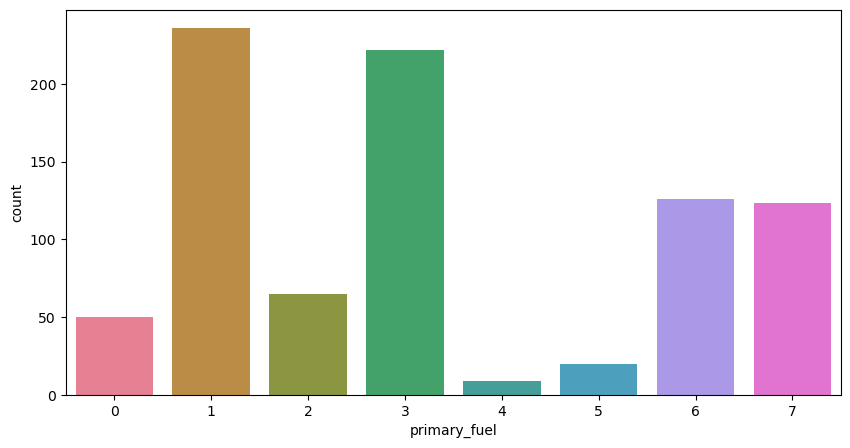

In [132]:
# Checking the count of feature 'primary_fuel' 

plt.figure(figsize=(10,5))
sns.countplot(y2,palette='husl')

Above countplot shows the classes are imbalanced, hence applying SMOTE technique to balance the classes

# Applying SMOTE Technique

In [133]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [135]:
# Applying SMOTE technique 

smt = SMOTE()

x4,y3 = smt.fit_resample(x3,y2)

6    236
1    236
7    236
2    236
3    236
0    236
5    236
4    236
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

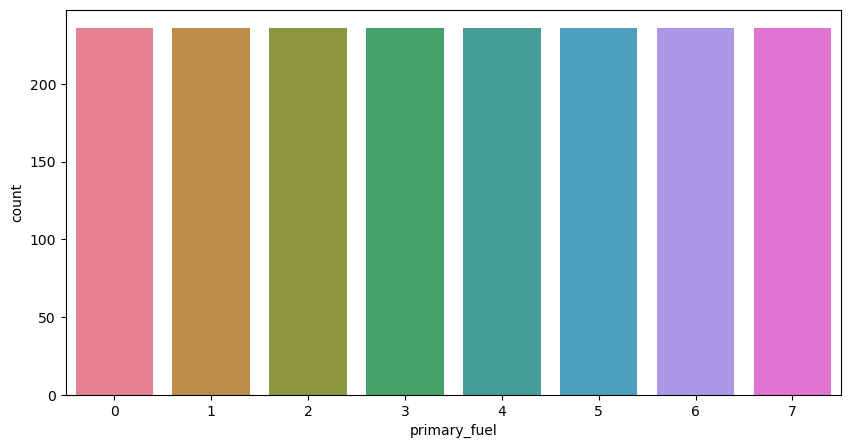

In [136]:
# Checking the count of feature 'primary_fuel' after applying 'SMOTE'

plt.figure(figsize=(10,5))
print(y3.value_counts())
sns.countplot(y3,palette='husl')

Applied SMOTE technique to balance the Target Variable primary_fuel

Above countplot shows target variable is equal in all the category

# Model Evaluation Classification

In [137]:
# Checking the dimension of the data 

x4.shape

(1888, 8)

In [138]:
# Checking the dimension of the data 

y3.shape

(1888,)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [140]:
#Finding Random State
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x4_train,x4_test,y3_train,y3_test = train_test_split(x4,y3,test_size=.30,random_state=i)
    rc = RandomForestClassifier()
    rc.fit(x4_train,y3_train)
    predrc = rc.predict(x4_test)
    acc = accuracy_score(y3_test,predrc)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 93.12169312169311 on Random State 161


In [141]:
# Training the Model with .30 as test size and random state at 31

x4_train,x4_test,y3_train,y3_test = train_test_split(x4,y3,test_size=.30, random_state=31)

## GaussianNB

In [142]:
GB = GaussianNB()
GB.fit(x4_train,y3_train)
print(GB.score(x4_train,y3_train))
GB_predict = GB.predict(x4_test)
cr12 = cross_val_score(GB,x4,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,GB_predict)*100)
print('CV score of GaussianNB:',cr12.mean()*100)
print(confusion_matrix(y3_test,GB_predict))
print(classification_report(y3_test,GB_predict))

0.5722937168811506
Accuracy Score: 56.261022927689595
CV score of GaussianNB: 57.15015508118956
[[75  0  0  0  0  0  0  0]
 [19  8  2 27 13  2  1  0]
 [ 6  0  1 56  2  0  0  0]
 [11  0  0 54  0  0  0  0]
 [ 0  1  3 28 40  1  0  0]
 [29  0  0 45  0  7  0  0]
 [ 2  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        75
           1       0.89      0.11      0.20        72
           2       0.17      0.02      0.03        65
           3       0.26      0.83      0.39        65
           4       0.73      0.55      0.62        73
           5       0.70      0.09      0.15        81
           6       0.98      0.97      0.98        62
           7       1.00      1.00      1.00        74

    accuracy                           0.56       567
   macro avg       0.66      0.57      0.51       567
weighted avg       0.66      0.56      0.50       567



## SVC

In [143]:
SV = SVC()
SV.fit(x4_train,y3_train)
print(SV.score(x4_train,y3_train))
SV_predict = SV.predict(x4_test)
cr13 = cross_val_score(SV,x4,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,SV_predict)*100)
print('CV score of SVC:',cr13.mean()*100)
print(confusion_matrix(y3_test,SV_predict))
print(classification_report(y3_test,SV_predict))

0.32778198334595005
Accuracy Score: 34.74426807760141
CV score of SVC: 37.39323256564636
[[53  0  0  2  0  3 17  0]
 [ 8  0  0 35 16  3  7  3]
 [ 4  0  0 59  0  0  2  0]
 [ 0  0  0 65  0  0  0  0]
 [ 3  0  0 35 34  1  0  0]
 [ 4  0  0 50  0  4 23  0]
 [11  0  0  4  1  3 41  2]
 [ 0  0  0 74  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        75
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        65
           3       0.20      1.00      0.33        65
           4       0.67      0.47      0.55        73
           5       0.29      0.05      0.08        81
           6       0.46      0.66      0.54        62
           7       0.00      0.00      0.00        74

    accuracy                           0.35       567
   macro avg       0.28      0.36      0.27       567
weighted avg       0.28      0.35      0.27       567



## Logistic Regression

In [144]:
LR = LogisticRegression()
LR.fit(x4_train,y3_train)
print(LR.score(x4_train,y3_train))
LR_predict = LR.predict(x4_test)
cr14 = cross_val_score(LR,x4,y3,cv=5)
    
print('Accuracy Score:',accuracy_score(y3_test,LR_predict)*100)
print('CV score of LogisticRegression:',cr14.mean()*100)
print(confusion_matrix(y3_test,LR_predict))
print(classification_report(y3_test,LR_predict))

0.639666919000757
Accuracy Score: 65.60846560846561
CV score of LogisticRegression: 63.76798169901618
[[72  0  0  1  0  2  0  0]
 [ 9 29 14  8  8  2  0  2]
 [ 5  6 22 13  1 18  0  0]
 [ 0  4  4 26  0 19  0 12]
 [ 0 13 11  3 43  3  0  0]
 [14  2  0  4  0 58  0  3]
 [ 2  0  1  0  0  0 59  0]
 [ 0  0  1  8  0  2  0 63]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.81        75
           1       0.54      0.40      0.46        72
           2       0.42      0.34      0.37        65
           3       0.41      0.40      0.41        65
           4       0.83      0.59      0.69        73
           5       0.56      0.72      0.63        81
           6       1.00      0.95      0.98        62
           7       0.79      0.85      0.82        74

    accuracy                           0.66       567
   macro avg       0.66      0.65      0.65       567
weighted avg       0.65      0.66      0.65       567



## RandomForestClassifier

In [146]:
RFC = RandomForestClassifier()
RFC.fit(x4_train,y3_train)
print(RFC.score(x4_train,y3_train))
RFC_predict = RFC.predict(x4_test)
cr15 = cross_val_score(RFC,x4,y3,cv=5)
    
print('Accuracy Score:',accuracy_score(y3_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr15.mean()*100)
print(confusion_matrix(y3_test,RFC_predict))
print(classification_report(y3_test,RFC_predict))

1.0
Accuracy Score: 91.53439153439153
CV score of RandomForestClassifier: 90.88978709668363
[[74  1  0  0  0  0  0  0]
 [ 3 53  5  7  2  1  0  1]
 [ 0  5 48  8  1  3  0  0]
 [ 0  1  3 61  0  0  0  0]
 [ 0  1  1  3 67  1  0  0]
 [ 0  1  0  0  0 80  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.85      0.74      0.79        72
           2       0.84      0.74      0.79        65
           3       0.77      0.94      0.85        65
           4       0.96      0.92      0.94        73
           5       0.94      0.99      0.96        81
           6       1.00      1.00      1.00        62
           7       0.99      1.00      0.99        74

    accuracy                           0.92       567
   macro avg       0.91      0.91      0.91       567
weighted avg       0.92      0.92      0.91       567



## Decision Tree Classifier

In [147]:
DTC = DecisionTreeClassifier()
DTC.fit(x4_train,y3_train)
print(DTC.score(x4_train,y3_train))
DTC_predict = DTC.predict(x4_test)
cr16 = cross_val_score(DTC,x4,y3,cv=5)
    
print('Accuracy Score:',accuracy_score(y3_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr16.mean()*100)
print(confusion_matrix(y3_test,DTC_predict))
print(classification_report(y3_test,DTC_predict))

1.0
Accuracy Score: 88.00705467372134
CV score of DecisionTreeClassifier: 86.75985572537297
[[73  2  0  0  0  0  0  0]
 [ 3 52  6  9  2  0  0  0]
 [ 0  4 46  7  1  7  0  0]
 [ 0  1  2 55  5  2  0  0]
 [ 0  6  1  1 63  2  0  0]
 [ 0  1  3  0  0 76  0  1]
 [ 1  0  0  0  0  0 61  0]
 [ 0  0  1  0  0  0  0 73]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        75
           1       0.79      0.72      0.75        72
           2       0.78      0.71      0.74        65
           3       0.76      0.85      0.80        65
           4       0.89      0.86      0.88        73
           5       0.87      0.94      0.90        81
           6       1.00      0.98      0.99        62
           7       0.99      0.99      0.99        74

    accuracy                           0.88       567
   macro avg       0.88      0.88      0.88       567
weighted avg       0.88      0.88      0.88       567



## KNeighbors Classifier

In [148]:
KNN = KNeighborsClassifier()
KNN.fit(x4_train,y3_train)
print(KNN.score(x4_train,y3_train))
KNN_predict=KNN.predict(x4_test)
cr17 = cross_val_score(KNN,x4,y3,cv=5)

print('Accuracy Score:',accuracy_score(y3_test,KNN_predict)*100)
print('CV Score KNeighborsClassifier:',cr17.mean()*100)
print(confusion_matrix(y3_test,KNN_predict))
print(classification_report(y3_test,KNN_predict))

0.8667676003028009
Accuracy Score: 76.71957671957672
CV Score KNeighborsClassifier: 80.35044138492415
[[60  3  2  0  0  8  2  0]
 [10 32  5  5  9  6  4  1]
 [ 2  3 53  0  1  5  0  1]
 [ 0  2  4 48  1 10  0  0]
 [ 4  3  2  5 59  0  0  0]
 [ 8  8  1  1  0 56  6  1]
 [ 4  2  0  0  0  3 53  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        75
           1       0.60      0.44      0.51        72
           2       0.79      0.82      0.80        65
           3       0.81      0.74      0.77        65
           4       0.84      0.81      0.83        73
           5       0.64      0.69      0.66        81
           6       0.82      0.85      0.83        62
           7       0.96      1.00      0.98        74

    accuracy                           0.77       567
   macro avg       0.77      0.77      0.77       567
weighted avg       0.76      0.77      0.76       567



## Gradient Boosting Classifier

In [149]:
GBC = GradientBoostingClassifier()
GBC.fit(x4_train,y3_train)
print(GBC.score(x4_train,y3_train))
GBC_predict = GBC.predict(x4_test)
cr18= cross_val_score(GBC,x4,y3,cv=5)

print('Accuracy Score:', accuracy_score(y3_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:', cr18.mean()*100)
print(confusion_matrix(y3_test,GBC_predict))
print(classification_report(y3_test,GBC_predict))

0.9954579863739591
Accuracy Score: 90.65255731922399
CV score of GradientBoostingClassifier: 89.93642372952718
[[73  1  0  0  0  1  0  0]
 [ 4 52  3  9  4  0  0  0]
 [ 0  2 55  4  1  3  0  0]
 [ 0  4  1 59  1  0  0  0]
 [ 0  2  1  3 66  1  0  0]
 [ 1  0  2  1  0 73  3  1]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.85      0.72      0.78        72
           2       0.89      0.85      0.87        65
           3       0.78      0.91      0.84        65
           4       0.92      0.90      0.91        73
           5       0.94      0.90      0.92        81
           6       0.95      1.00      0.98        62
           7       0.99      1.00      0.99        74

    accuracy                           0.91       567
   macro avg       0.91      0.91      0.90       567
weighted avg       0.91      0.91      0.91       567



## AdaBoost Classifier

In [150]:
ABC = AdaBoostClassifier()
ABC.fit(x4_train,y3_train)
print(ABC.score(x4_train,y3_train))
ABC_predict = ABC.predict(x4_test)
cv19 = cross_val_score(ABC,x4,y3,cv=5)

print('Accuracy Score:', accuracy_score(y3_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:', cv19.mean()*100)
print(confusion_matrix(y3_test,ABC_predict))
print(classification_report(y3_test,ABC_predict))

0.33989401968205907
Accuracy Score: 32.27513227513227
CV score of AdaBoostClassifier: 33.31579021234193
[[55  0  0 20  0  0  0  0]
 [ 6  0  0 61  0  5  0  0]
 [ 6  0  0 58  0  1  0  0]
 [ 0  0  0 65  0  0  0  0]
 [ 0  0  0 73  0  0  0  0]
 [12  0  0 66  0  3  0  0]
 [ 2  0  0  0  0  0 60  0]
 [ 0  0  0  0  0 74  0  0]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        75
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        65
           3       0.19      1.00      0.32        65
           4       0.00      0.00      0.00        73
           5       0.04      0.04      0.04        81
           6       1.00      0.97      0.98        62
           7       0.00      0.00      0.00        74

    accuracy                           0.32       567
   macro avg       0.24      0.34      0.26       567
weighted avg       0.23      0.32      0.24       567



## Bagging Classifier

In [151]:
BC =  BaggingClassifier()
BC.fit(x4_train,y3_train)
print(BC.score(x4_train,y3_train))
BC_predict = BC.predict(x4_test)
cv20 = cross_val_score(BC,x4,y3,cv=5)

print('Accuracy Score:', accuracy_score(y3_test,BC_predict)*100)
print('CV score of Bagging Classifier:', cv20.mean()*100)
print(confusion_matrix(y3_test,BC_predict))
print(classification_report(y3_test,BC_predict))

0.9984859954579863
Accuracy Score: 88.88888888888889
CV score of Bagging Classifier: 88.87709991158268
[[73  2  0  0  0  0  0  0]
 [ 5 50  6  6  5  0  0  0]
 [ 0  2 49  7  0  7  0  0]
 [ 0  2  2 59  1  1  0  0]
 [ 0  6  1  3 62  1  0  0]
 [ 0  0  5  0  0 76  0  0]
 [ 1  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.81      0.69      0.75        72
           2       0.78      0.75      0.77        65
           3       0.79      0.91      0.84        65
           4       0.91      0.85      0.88        73
           5       0.89      0.94      0.92        81
           6       1.00      0.98      0.99        62
           7       1.00      1.00      1.00        74

    accuracy                           0.89       567
   macro avg       0.89      0.89      0.89       567
weighted avg       0.89      0.89      0.89       567



## AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [152]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

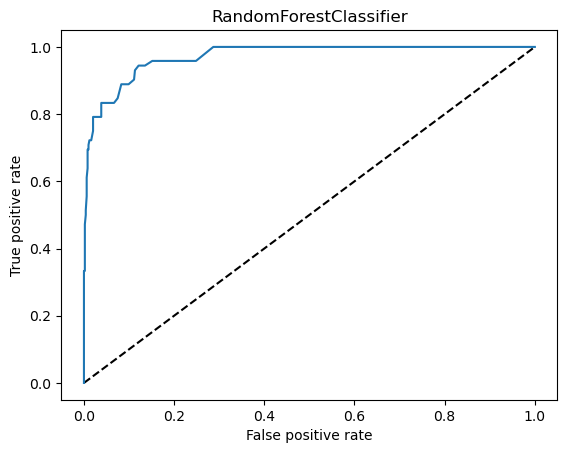

0.9923967795500401

In [153]:
# Checking roc_auc_score for RandomForestClassifier

y_pred_prob = RFC.predict_proba(x4_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y3_test,RFC.predict_proba(x4_test),multi_class='ovr')
auc_score

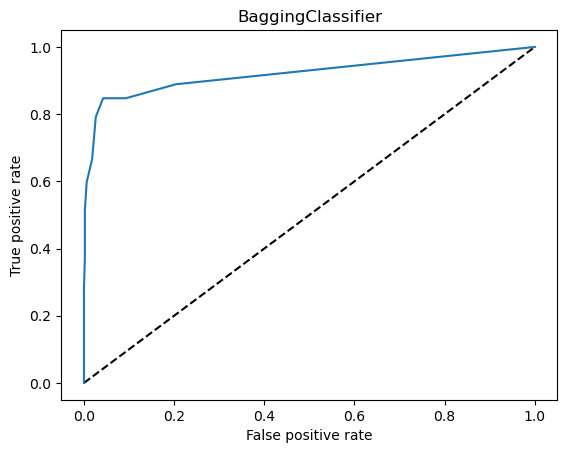

0.9793386719534599

In [154]:
# Checking roc_auc_score for BaggingClassifier

y_pred_prob = BC.predict_proba(x4_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BaggingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('BaggingClassifier')
plt.show()
auc_score = roc_auc_score(y3_test,BC.predict_proba(x4_test),multi_class='ovr')
auc_score

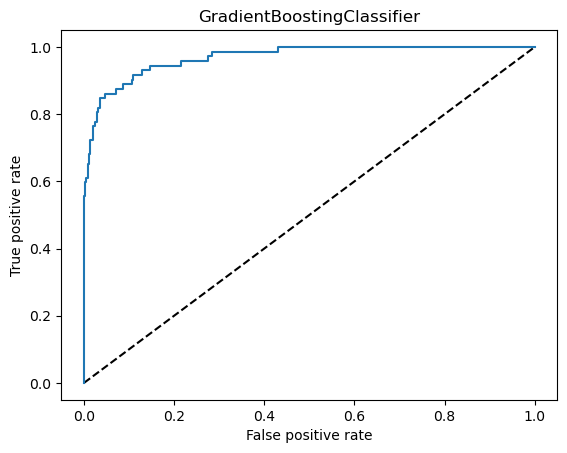

0.989738650020504

In [155]:
# Checking roc_auc_score for GradientBoostingClassifier

y_pred_prob = GBC.predict_proba(x4_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score = roc_auc_score(y3_test,GBC.predict_proba(x4_test),multi_class='ovr')
auc_score

Based on Model Evaluation RandomForestClassifier is performing well with accuracy score of 93% ,roc_auc_score 99% and Cross validation score of 91% which is good compared with other Models

Let's proceed with Hyper Parameter Tuning to enhance the Model

## Hyper Parameter Tuning

In [156]:
grid_params={'n_estimators':[50,80,100],'criterion':['gini','entropy','log_loss'],
            'max_depth':[50,80,100],'min_samples_split':[2,4,5],'min_samples_leaf': [1,2]}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x4_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [50, 80, 100], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 80, 100]})
Best Score 0.9046112064036593
Best Params {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## Final Model Classification

In [157]:
Final_Model3 = RandomForestClassifier(n_estimators =100, criterion = 'gini',max_depth=50,min_samples_split=2,
                                     min_samples_leaf=1)
                                       
Final_Model3.fit(x4_train,y3_train)
pred3 = Final_Model3.predict(x4_test)
print(Final_Model3.score(x4_train,y3_train))
cr22 = cross_val_score(Final_Model3,x4,y3,cv=5)

print(accuracy_score(y3_test,pred3)*100)
print('CV score of RandomForestClassifier:',cr22.mean()*100)
print(confusion_matrix(y3_test,pred3))
print(classification_report(y3_test,pred3))

1.0
92.5925925925926
CV score of RandomForestClassifier: 90.99602823740754
[[74  1  0  0  0  0  0  0]
 [ 3 54  4  7  2  1  0  1]
 [ 0  4 52  5  0  4  0  0]
 [ 0  2  2 61  0  0  0  0]
 [ 0  1  1  2 68  1  0  0]
 [ 0  1  0  0  0 80  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.86      0.75      0.80        72
           2       0.88      0.80      0.84        65
           3       0.81      0.94      0.87        65
           4       0.97      0.93      0.95        73
           5       0.93      0.99      0.96        81
           6       1.00      1.00      1.00        62
           7       0.99      1.00      0.99        74

    accuracy                           0.93       567
   macro avg       0.93      0.92      0.92       567
weighted avg       0.93      0.93      0.92       567



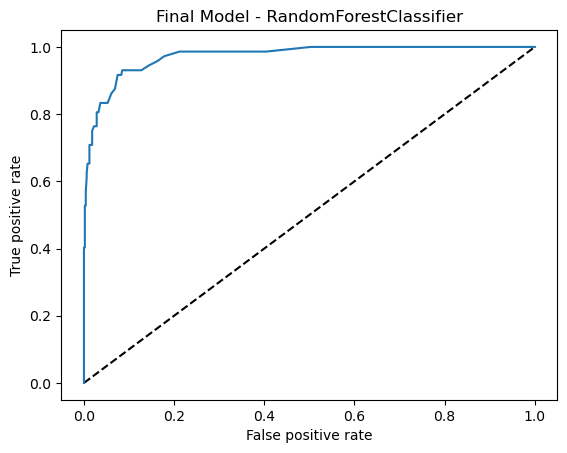

0.9929475151531617

In [158]:
# Checking roc_auc_score for Final_Model3

y_pred_prob = Final_Model3.predict_proba(x4_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Final Model - RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y3_test,Final_Model3.predict_proba(x4_test),multi_class='ovr')
auc_score

Based on Accuracy Score 93% Vs Cross Validation Score 91% Vs AUC_ROC_Curve 99%

Concluding Random Forest Classifier Model is the best fit model for classification to predict the 'primary_fuel' for Global Power Plant datasetm

## Saving the Final model - RandomForestClassifier

In [159]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model3,"Global_pp_fuel.pkl")

['Global_pp_fuel.pkl']

## Predicting the Model

In [160]:
# Loading the saved model

Model2=joblib.load("Global_pp_fuel.pkl")

#Prediction
prediction2 = Model2.predict(x4_test)
prediction2

array([4, 6, 7, 2, 5, 3, 3, 1, 0, 3, 0, 4, 4, 5, 2, 3, 3, 1, 5, 6, 6, 7,
       3, 2, 4, 1, 0, 3, 6, 5, 0, 6, 2, 7, 2, 3, 3, 7, 3, 1, 7, 5, 5, 0,
       3, 2, 2, 3, 0, 5, 3, 2, 7, 1, 7, 3, 1, 7, 6, 5, 2, 1, 7, 3, 3, 2,
       5, 5, 3, 7, 0, 3, 2, 0, 0, 4, 3, 6, 2, 1, 6, 3, 3, 4, 3, 1, 0, 4,
       4, 7, 4, 7, 2, 3, 2, 2, 1, 2, 1, 7, 5, 0, 3, 0, 0, 5, 3, 4, 3, 3,
       5, 6, 7, 2, 4, 2, 4, 4, 6, 7, 0, 5, 1, 5, 3, 7, 2, 5, 5, 5, 0, 7,
       6, 5, 1, 0, 5, 0, 2, 0, 1, 5, 3, 5, 0, 0, 7, 5, 5, 1, 3, 6, 6, 7,
       6, 6, 5, 0, 4, 0, 3, 3, 2, 3, 7, 4, 4, 2, 3, 7, 7, 6, 5, 5, 0, 6,
       4, 5, 3, 2, 0, 2, 1, 1, 5, 7, 3, 0, 5, 6, 0, 3, 2, 5, 2, 1, 7, 1,
       6, 5, 0, 3, 1, 0, 4, 5, 7, 2, 1, 4, 4, 3, 6, 0, 7, 7, 6, 0, 1, 6,
       1, 0, 7, 6, 2, 7, 7, 4, 6, 5, 5, 5, 2, 5, 5, 0, 1, 0, 7, 0, 1, 1,
       2, 1, 1, 3, 3, 5, 6, 3, 7, 2, 4, 3, 5, 6, 3, 0, 5, 0, 2, 1, 4, 6,
       3, 7, 1, 5, 5, 3, 0, 0, 3, 4, 0, 6, 0, 7, 3, 4, 2, 5, 4, 3, 1, 2,
       2, 2, 2, 4, 1, 5, 3, 6, 7, 7, 7, 0, 3, 4, 5,

In [161]:
pd.DataFrame([Model2.predict(x4_test)[:],y3_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,4,4
1,6,6
2,7,7
3,2,2
4,5,5
...,...,...
562,7,7
563,7,7
564,1,1
565,4,4


## Conclusion For Classification Model

RandomForestClassifier Model which was built on the Global Power Plant dataset to predict the 'primary_fuel' of power plants is performing good as we can see, Original Vs Predicted value is same, which shows the developed Model is performing well with the given dataset.

## Final Conclusion

Global Power Plant Dataset contains 907 rows and 27 columns, but when we do the data analysis we can find most of the features are with null values, due to which we have dropped most of the features and kept few by replacing null values.

Dataset contains the power plants present in India

With the available dataset we can observe that maximum count of 28 power plants has been commissioned in the year 2015 followed by 25 power plants in the year 2013 and 23 power plants at 2012.

Power Plants with capacity ranges from 5 to 1000 megawatts are maximum in India

Power plants which uses Nuclear as primary fuel has the maximum capacity of 975 megawatts to generate electricity followed by power plants which uses Coal with 797 megawatts and power plants which uses gas with 364 megawatts of capacity

We can also observe from 2014 to 2018 power plants which uses Coal and Nuclear produced maximum electricity in India

Before 1980's Hydro powered power plants are maximum in India After 1980's power plants which uses coal as primary fuel started increasing with larger capacity across the country

More than 50% of the data source are reported by Central Electricity Authority and most of the data were not present in the dataset.

Data provided may vary if complete details was present in the Global Power Plant Dataset

Finally, 851 rows 8 columns were utilized for building Regression Model to predict 'capacity_mw'

For Classification as the classes were imbalanced, Applied SMOTE technique to balance the Target Variable and utilized 1888 rows, 8 columns for building classification Model to predict 'primary_fuel',

Both the Model which was built on the base of the Global Power Plant dataset is predicting good as we can see, Original Vs Predicted value is same.

For Regression, RandomForestRegressor is the best fit model to predict 'capacity_mw' with r2_score of 86% For Classification, RandomForestClassifier is the best fit model to predict 'primary_fuel' with accuracy_score of 93%

Thank you for Providing the opportunity to work on the Global Power Plant Dataset.